# **1_GENERAL DATA INFORMATION**

## **1_1_CONTEXT**

Database ini menjelaskan mengenai perusahaan fiktif bernama "Northwind Traders". Perusahaan ini bergerak di bidang export dan import "speciality food" dari seluruh dunia. Perusahaan ingin mengetahui gambaran umum tentang bisnis yang sedang mereka jalankan. Apakah ada hal hal yang bisa ditingkatkan atau dinotice dari data yang ada? Dari insight yang dihasilkan diharapkan bisa membantu perusahaan dalam menentukan langkah strategis untuk mengembangkan perusahaan dan lain sebagainya.
<br>

**Fokus Analisis : Orders**

## **1_2_DATABASE INFORMATION**

Database yang dimiliki mempunyai 13 tabel, yaitu:
- orders : berisikan detail transaksi seperti, order id, tanggal pengiriman, lokasi pengiriman, dsb
- employees : berisikan informasi karyawan seperti id, nama, jabatan, tanggal lahir, alamat tinggal, dsb
- employeesterritories : berisikan informasi id karyawan dan id daerah
- territories : berisikan informasi id daerah, dan deskrispsi daerah tersebut
- region : berisikan region id dan region description
- orderdetails : berisikan detail order seperti order id, product id, hargasatuan, quantity, discount
- products : berisikan informasi product seperti product id, supplier id, category, satuan, harga satuan, jumlah stok, jumlah unit dalam pemesanan, dsb
- categories : berisikan informasi kategori seperti, categoryid, categoryname, deskripsi, dan ilustrasi
- suppliers : berisikan informasi supplier seperti nama perusahaan supplier, PIC, jabatan PIC, detail alamat perusahaan supplier, nomor telepon, dsb
- customers : berisikan informasi customer seperti nama perusahaan pemesan, PIC, jabatan PIC, detail alamat perusahaan pemesan, nomor telepon dan lain sebagainya
- customercustomerdemo & customerdemographics : (tidak ada data yang tersedia)
- shippers : berikan informasi jasa delivery yang digunakan seperti, shipperid, nama perusahaan dan nomor telepon.

## **1_3_TABLE RELATIONSHIP** 

berikut ini diberikan Entity Relationship Diagram (ERD) untuk database "Northwind"
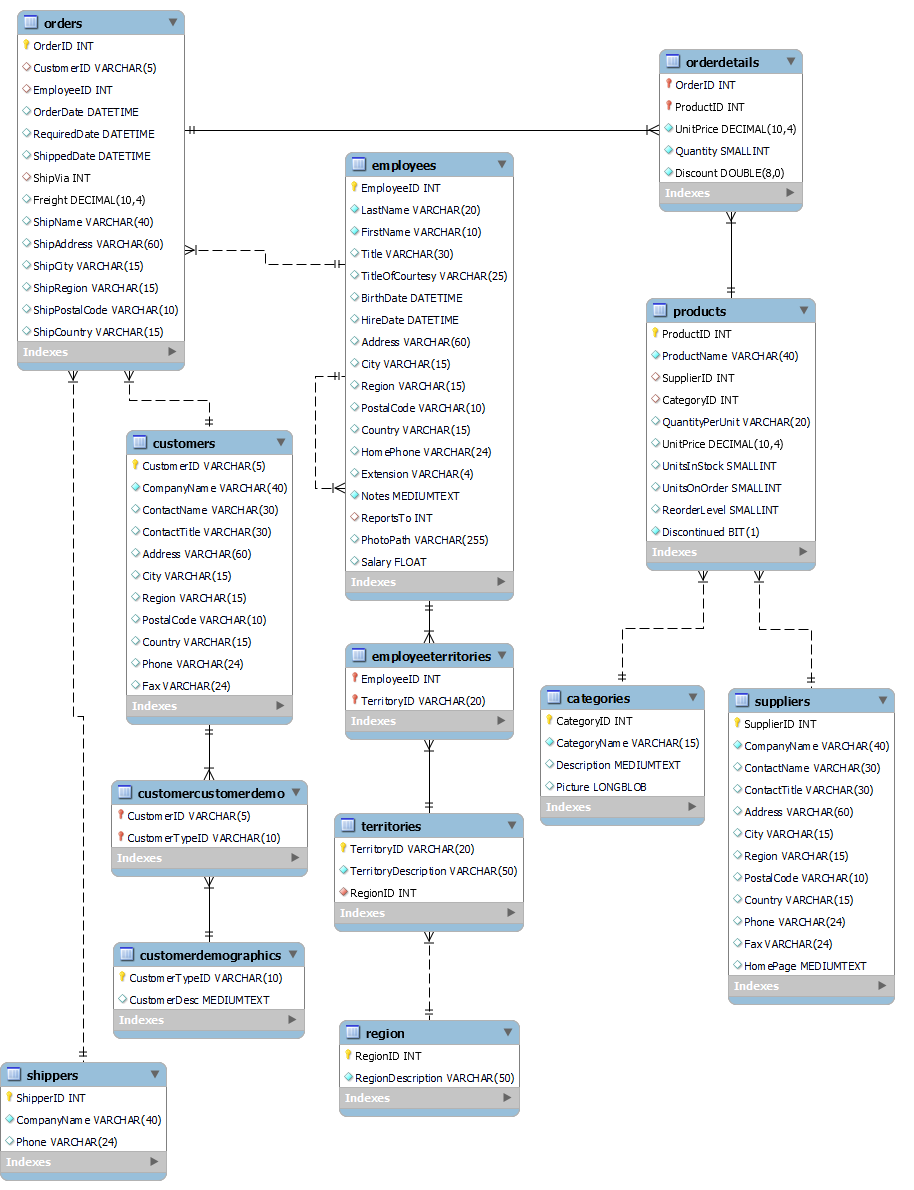

# LIBRARY

In [1]:
# library untuk menghubungkan SQL dengan python
import mysql.connector

# library untuk data manipulation dan data in general
import numpy as np
import pandas as pd

# library untuk visualisasi 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

# library yang berhubungan dengan statistik
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

# adjusting column width
pd.set_option('display.max_colwidth', -1)

# displaying column side by side
from IPython.display import display_html
from IPython.display import IFrame
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    
import warnings
warnings.filterwarnings("ignore")

C:\Users\HOME\AppData\Local\Temp/ipykernel_24024/4281489136.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# **2_SQL**
* SQL TO PYTHON CONNECTION
* USING CTE OR OTHER WINDOW FUNCTION (IF NEEDED)
* BUILT – IN FUNCTION AS NEEDED

## **2_1_CONNECTING TO DATABASE**

In [2]:
# create connection
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    passwd = "password",
    database = "northwind")

# create access to database
mycursor = mydb.cursor()

# Create Function
def sql_df(yourQuery):
    mycursor.execute(yourQuery)
    myResult = mycursor.fetchall()
    df = pd.DataFrame(myResult, columns = mycursor.column_names)
    return df

In [3]:
# trial output
sql_df('''
SHOW TABLES;
''')

,Tables_in_northwind
0,categories
1,customercustomerdemo
2,customerdemographics
3,customers
4,employees
5,employeeterritories
6,orderdetails
7,orders
8,products
9,region


## **2_2_1_SQL - TASK (TABLE INTEPRETATION)**
Fokus analisis saya adalah "orders", maka dari itu saya membutuhkan seluruh table yang berisikan informasi mengenai "orders" yang dilakukan. Untuk mengetahui tabel apa yang dibutuhkan untuk membahas fokus analisis "orders", dapat melihat pada ERD yang diberikan diatas.

Dari gambar ERD yang diberikan diatas. untuk membahas "orders", diperlukan tabel sebagai berikut : 
<br>
(untuk penjelasan setiap tabel diberikan pada point 1_2)
- orders
- orderdetails
- products
- category
- customers
- shippers

tabel tabel tersebut coba saya munculkan dibawah ini. Langkah selanjutnya adalah memilih kolom tertentu yang sekiranya relevan dengan fokus analisis yang akan dibahas (pada case ini adalah "orders")

pada bagian selanjutnya akan saya jabarkan data kolom apa saja yang diperlukan dari keempat tabel tersebut dan akan saya combine menjadi sebuah dataframe

In [4]:
sql_df('''
SELECT * FROM orders
''')

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.3800,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.6100,Toms Spezialitten,Luisenstr. 48,Mnster,None,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.8300,Hanari Carnes,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.3400,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.3000,Suprmes dlices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02,NaT,2,24.9500,Pericles Comidas clsicas,Calle Dr. Jorge Cash 321,Mxico D.F.,None,5033,Mexico
826,11074,SIMOB,7,1998-05-06,1998-06-03,NaT,2,18.4400,Simons bistro,Vinbltet 34,Kobenhavn,None,1734,Denmark
827,11075,RICSU,8,1998-05-06,1998-06-03,NaT,2,6.1900,Richter Supermarkt,Starenweg 5,Genve,None,1204,Switzerland
828,11076,BONAP,4,1998-05-06,1998-06-03,NaT,2,38.2800,Bon app-,"12, rue des Bouchers",Marseille,None,13008,France


In [5]:
sql_df('''
SELECT * FROM orderdetails;
''')

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0000,12,0.0
1,10248,42,9.8000,10,0.0
2,10248,72,34.8000,5,0.0
3,10249,14,18.6000,9,0.0
4,10249,51,42.4000,40,0.0
...,...,...,...,...,...
2150,11077,64,33.2500,2,0.0
2151,11077,66,17.0000,1,0.0
2152,11077,73,15.0000,2,0.0
2153,11077,75,7.7500,4,0.0


In [6]:
sql_df('''
SELECT * FROM products;
''')

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0000,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0000,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.0000,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.3500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,73,Rd Kaviar,17,8,24 - 150 g jars,15.0000,101,0,5,0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.0000,4,20,5,0
74,75,Rhnbru Klosterbier,12,1,24 - 0.5 l bottles,7.7500,125,0,25,0
75,76,Lakkalikri,23,1,500 ml,18.0000,57,0,20,0


In [7]:
sql_df('''
SELECT * FROM categories
''')

CategoryID    CategoryName  \
0  1           Beverages        
1  2           Condiments       
2  3           Confections      
3  4           Dairy Products   
4  5           Grains/Cereals   
5  6           Meat/Poultry     
6  7           Produce          
7  8           Seafood          

                                                  Description  \
0  Soft drinks, coffees, teas, beers, and ales                  
1  Sweet and savory sauces, relishes, spreads, and seasonings   
2  Desserts, candies, and sweet breads                          
3  Cheeses                                                      
4  Breads, crackers, pasta, and cereal                          
5  Prepared meats                                               
6  Dried fruit and bean curd                                    
7  Seaweed and fish                                             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
sql_df('''
SELECT * FROM customers;
''')

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitucin 2222,Mxico D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquera,Antonio Moreno,Owner,Mataderos 2312,Mxico D.F.,None,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbkp,Christina Berglund,Order Administrator,Berguvsvgen 8,Lule,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
...,...,...,...,...,...,...,...,...,...,...,...
88,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,None,90110,Finland,981-443655,981-443655
89,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,(14) 555-8122,None
90,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115
91,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,None,21240,Finland,90-224 8858,90-224 8858


In [9]:
sql_df('''
SELECT * FROM shippers
''')

,ShipperID,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


## **2_2_2_SQL - TASK (TABLE CREATION)**
Setelah menelaah data diatas, informasi yang dibutuhkan dari tiap tabel untuk membahas fokus analisis "orders" adalah sebagai berikut : 
- tabel orders : OrderID, OrderDate, RequiredDate, ShippedDate, ShipCity, ShipRegion, ShipCountry
- tabel orderdetail : OrderID, ProductID, UnitPrice, Quantity, Discount
- tabel products : ProductID, ProductName, CategoryID, UnitPrice, UnitsInStock, UnitsOnOrder, ReorderLevel, Discontinued
- tabel categories : CategoryID, CategoryName, Description
- tabel customers : Companyname
- tabel Shippers : Companyname

Tidak seluruh data kolom diatas akan saya munculkan. ada beberapa yang merupakan key yang akan digunakan untuk menghubungkan informasi antar tabel. 

Kolom - kolom dari tabel tersebut juga saya susun sedemikian rupa agar memudahkan saya dalam menelaah informasi. untuk susunan kolomnya akan saya jelaskan dengan gambar dibawah ini. warna warna tersebut menginformasikan source tabel dari kolom tersebut.

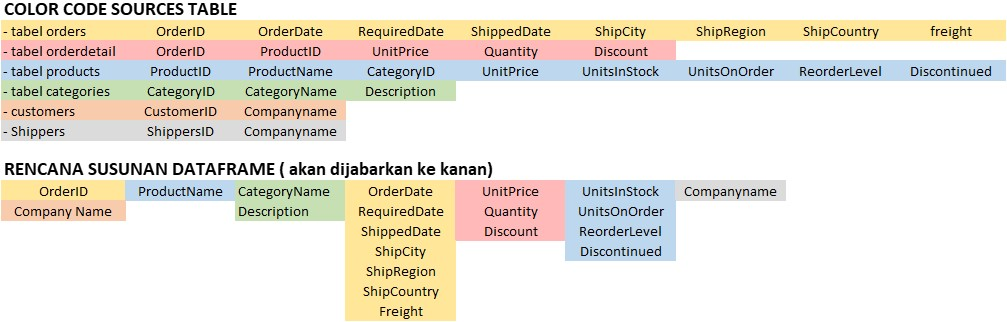

keseluruhan kolom diatas akan saya gabungkan menggunakan left join dengan tabel orders yang berada di sebelah kiri. Mengapa tabel demikian ? 

karena jika dilihat dari ERD dan pemahaman saya akan data yang ada, bahwa orderId pada tabel orders lah yang menjadi referensi untuk mengambil data dari tabel - tabel lain. Hasil query akan kita masukan ke variabel df

In [10]:
df = sql_df('''
SELECT  o.orderid, cust.companyname,
        p.productname,
        cat.categoryname, cat.description,
        o.orderdate, o.requireddate, o.shippeddate, o.shipcity, o.shipregion, o.shipcountry, o.freight,
        odtl.unitprice, odtl.quantity, odtl.discount,
        p.unitsinstock, p.unitsonorder, p.reorderlevel, p.discontinued,
        shp.CompanyName AS deliv_by
FROM orders o
LEFT JOIN orderdetails odtl
USING (orderid)
LEFT JOIN products p
USING (productid)
LEFT JOIN categories cat
USING (categoryid)
LEFT JOIN customers cust
USING(CustomerID)
LEFT JOIN shippers shp
ON o.ShipVia = shp.ShipperID;
''')

df.head(5)

,orderid,companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipregion,shipcountry,freight,unitprice,quantity,discount,unitsinstock,unitsonorder,reorderlevel,discontinued,deliv_by
0,10248,Vins et alcools Chevalier,Queso Cabrales,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,14.0000,12,0.0,22,30,30,0,Federal Shipping
1,10248,Vins et alcools Chevalier,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,9.8000,10,0.0,26,0,0,1,Federal Shipping
2,10248,Vins et alcools Chevalier,Mozzarella di Giovanni,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,34.8000,5,0.0,14,0,0,0,Federal Shipping
3,10249,Toms Spezialitten,Tofu,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Mnster,None,Germany,11.6100,18.6000,9,0.0,35,0,0,0,Speedy Express
4,10249,Toms Spezialitten,Manjimup Dried Apples,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Mnster,None,Germany,11.6100,42.4000,40,0.0,20,0,10,0,Speedy Express


## **2_3_SQL (CTE & WINDOW FUNCTION)**
Di awal. saya merasa bahwa ada perbedaan harga antara unit price dari tabel product dengan unit price dari tabel order details. Untuk memeriksa hal ini, saya membuat query baru untuk mengecek harga dari kedua tabel tersebut. Untuk rencana tabelnya akan menjadi seperti gambar dibawah ini. 

Jika diperhatikan saya akan menerapkan fungsi CTE dan beberapa window function seperti OVER(PARTITION BY) dan ROW_NUMBER(PARTITION BY). Saya menggunakan window function agar tidak ada row data saya yang hilang dan saya bisa melakukan komparasi nilai berdasarkan product name ataupun kategori. 

Hal ini tidak bisa saya penuhi bila saya menggunakan aggregat function.

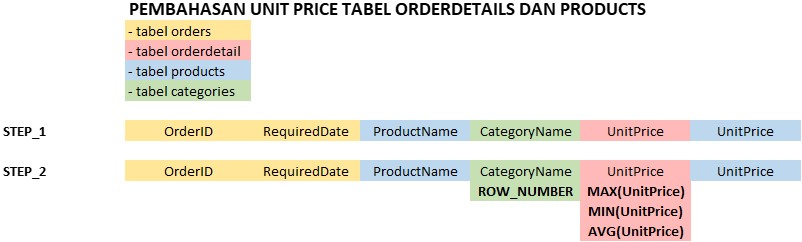

In [11]:
sql_df('''
WITH step_1 AS(
SELECT  o.orderid,
        o.requireddate,
        p.productname,
        cat.categoryname,
        odtl.unitprice AS odtl_unitprice,
        p.unitprice AS prodcat_unitprice
FROM orders o
LEFT JOIN orderdetails odtl
USING (orderid)
LEFT JOIN products p
USING (productid)
LEFT JOIN categories cat
USING (categoryid)
),
step_2 AS(
SELECT  orderid,
        requireddate,
        productname,
        categoryname,
        ROW_NUMBER() OVER(PARTITION BY categoryname) AS row_number_cat,                          -- the extra
        ROUND(odtl_unitprice,3) AS odtl_unitprice,
        ROUND(MIN(odtl_unitprice) OVER(PARTITION BY productname),3) AS min_odtl_unit_price,      -- the extra
        ROUND(MAX(odtl_unitprice) OVER(PARTITION BY productname),3) AS max_odtl_unit_price,      -- the extra
        ROUND(AVG(odtl_unitprice) OVER(PARTITION BY productname),3) AS avg_odtl_unit_price,      -- the extra
        ROUND(prodcat_unitprice,3) AS prodcat_unitprice
FROM step_1
)
SELECT  orderid,
        requireddate,
        productname,
        categoryname,
        row_number_cat,                         
        odtl_unitprice,
        max_odtl_unit_price,     
        min_odtl_unit_price,
        avg_odtl_unit_price,
        prodcat_unitprice
FROM step_2
-- UJI 1
-- untuk menguji bisa menggunakan product name, 
-- beberapa product name yang telah saya uji adalah Chang, Guaran Fantstica dan Jack's New England Clam Chowder
-- Thringer Rostbratwurst
WHERE productname = "Thringer Rostbratwurst"
LIMIT 20;
-- UJI 2
-- awalnya row_number_cat ingin saya gunakan untuk memfilter item yang muncul agar tidak terlalu banyak
-- tapi sepertinya permasalahan saya terjawab dengan menggunakan uji 1
-- WHERE row_number_cat < 5;
-- bila diperhatikan, jack's New Englan Clam Chowder tidak dimulai dari 1, kenapa demikian ? 
-- karena kita membuat row_number berdasarkan kategori. jadi untuk row_number_cat <= 5 untuk categoryname = "Seafood",
-- diisi dengan product lain (yang masih di dalam category seafood)
''')

,orderid,requireddate,productname,categoryname,row_number_cat,odtl_unitprice,max_odtl_unit_price,min_odtl_unit_price,avg_odtl_unit_price,prodcat_unitprice
0,10268,1996-08-27,Thringer Rostbratwurst,Meat/Poultry,4,99.000,123.790,99.000,116.043,123.790
1,10290,1996-09-24,Thringer Rostbratwurst,Meat/Poultry,9,99.000,123.790,99.000,116.043,123.790
2,10305,1996-10-11,Thringer Rostbratwurst,Meat/Poultry,12,99.000,123.790,99.000,116.043,123.790
3,10354,1996-12-12,Thringer Rostbratwurst,Meat/Poultry,24,99.000,123.790,99.000,116.043,123.790
4,10360,1996-12-20,Thringer Rostbratwurst,Meat/Poultry,26,99.000,123.790,99.000,116.043,123.790
5,10369,1996-12-30,Thringer Rostbratwurst,Meat/Poultry,30,99.000,123.790,99.000,116.043,123.790
6,10382,1997-01-10,Thringer Rostbratwurst,Meat/Poultry,33,99.000,123.790,99.000,116.043,123.790
7,10400,1997-01-29,Thringer Rostbratwurst,Meat/Poultry,38,99.000,123.790,99.000,116.043,123.790
8,10440,1997-03-10,Thringer Rostbratwurst,Meat/Poultry,49,99.000,123.790,99.000,116.043,123.790
9,10465,1997-04-02,Thringer Rostbratwurst,Meat/Poultry,57,99.000,123.790,99.000,116.043,123.790


dari data yang telah diberikan diatas. ternyata tebakan saya cukup tepat. salah satu product yaitu "Thringer Rostbratwurst" jika dilihat feature "unitprice" dari orderdetails, terjadi peningkatan harga dari yang awalnya 99 menjadi 123.790 pada 1977-04-02 ke 1977-05-16. 

untuk perbedaan harga ini mungkin terjadi karena tabel product merupakan katalog produk yang secara berkala diupdate. berbeda dengan orderdetails yang merupakan tabel untuk menyimpan historis keseluruhan data penjualan tiap waktu ke waktu.

Untuk kenaikan harga sendiri bisa disebabkan karena beberapa hal. 
Jika kita lihat data yang ada, untuk produk "Thringer Rostbratwurst" memiliki harga yang sama setiap bulannya dari tahun 1996-08-27 s.d tahun 1997-04-02 sebesar 99. kemudian harga naik pada tahun 1977-05-16 menjadi 123.790. Hal ini mungkin terjadi karena kontrak payungnya habis atau ada pembaharuan kontrak jual beli. Kontrak payung sendiri adalah perjanjian jual beli antara kedua belah pihak yang berisikan ketentuan tarif harga jasa atau produk dalam kurun waktu tertentu. Jika kontrak ini habis perlu ada pembaharuan kontrak untuk melanjutkan kerjasama.

hal ini akan saya telusuri lebih dalam pada data visualization untuk melihat keseluruhan productname dan dinamika harga tiap kurun waktu tertentu.

# **3_DATA MANIPULATION**
* ANY ANOMALIES ? (MISSING VALUE, OUTLIER, DATA FORMATTING, DOUBLE DATA ? 
* HOW TO DEAL WITH THE ANOMALIES ? 
* IF THERE’S NO ANOMALIES, PROVE IT 

disini kita panggil kembali dataframe yang telah dibuat pada section : (2_2_2_SQL - TASK (TABLE CREATION)). disini saya akan membuat backup dari data df. data original df ingin saya pertahankan. jika terjadi hal yang tidak diinginkan, saya bisa kembali ke versi original.

In [12]:
df_1 = df.copy()
df_1

,orderid,companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipregion,shipcountry,freight,unitprice,quantity,discount,unitsinstock,unitsonorder,reorderlevel,discontinued,deliv_by
0,10248,Vins et alcools Chevalier,Queso Cabrales,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,14.0000,12,0.0,22,30,30,0,Federal Shipping
1,10248,Vins et alcools Chevalier,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,9.8000,10,0.0,26,0,0,1,Federal Shipping
2,10248,Vins et alcools Chevalier,Mozzarella di Giovanni,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,None,France,32.3800,34.8000,5,0.0,14,0,0,0,Federal Shipping
3,10249,Toms Spezialitten,Tofu,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Mnster,None,Germany,11.6100,18.6000,9,0.0,35,0,0,0,Speedy Express
4,10249,Toms Spezialitten,Manjimup Dried Apples,Produce,Dried fruit and bean curd,1996-07-05,1996-08-16,1996-07-10,Mnster,None,Germany,11.6100,42.4000,40,0.0,20,0,10,0,Speedy Express
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,Rattlesnake Canyon Grocery,Wimmers gute Semmelkndel,Grains/Cereals,"Breads, crackers, pasta, and cereal",1998-05-06,1998-06-03,NaT,Albuquerque,NM,USA,8.5300,33.2500,2,0.0,22,80,30,0,United Package
2151,11077,Rattlesnake Canyon Grocery,Louisiana Hot Spiced Okra,Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings",1998-05-06,1998-06-03,NaT,Albuquerque,NM,USA,8.5300,17.0000,1,0.0,4,100,20,0,United Package
2152,11077,Rattlesnake Canyon Grocery,Rd Kaviar,Seafood,Seaweed and fish,1998-05-06,1998-06-03,NaT,Albuquerque,NM,USA,8.5300,15.0000,2,0.0,101,0,5,0,United Package
2153,11077,Rattlesnake Canyon Grocery,Rhnbru Klosterbier,Beverages,"Soft drinks, coffees, teas, beers, and ales",1998-05-06,1998-06-03,NaT,Albuquerque,NM,USA,8.5300,7.7500,4,0.0,125,0,25,0,United Package


## **3_1_GENERAL INFORMATION FOR DATA**

di awal saya ingin melihat general information dari data yang kita punya. kita akan gunakan .info() dan .describe() dan len(df_1). len(df_1) untuk mengetahui jumlah data awal kita sebelum dilakukan perubahan untuk mengatasi anomali data.

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   orderid       2155 non-null   int64         
 1   companyname   2155 non-null   object        
 2   productname   2155 non-null   object        
 3   categoryname  2155 non-null   object        
 4   description   2155 non-null   object        
 5   orderdate     2155 non-null   datetime64[ns]
 6   requireddate  2155 non-null   datetime64[ns]
 7   shippeddate   2082 non-null   datetime64[ns]
 8   shipcity      2155 non-null   object        
 9   shipregion    856 non-null    object        
 10  shipcountry   2155 non-null   object        
 11  freight       2155 non-null   object        
 12  unitprice     2155 non-null   object        
 13  quantity      2155 non-null   int64         
 14  discount      2155 non-null   float64       
 15  unitsinstock  2155 non-null   int64   

In [14]:
df_1.describe()

,orderid,quantity,discount,unitsinstock,unitsonorder,reorderlevel,discontinued
count,2155.000000,2155.000000,2155.0,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,23.812993,0.0,39.795824,8.074246,11.900232,0.105800
std,241.378032,19.022047,0.0,36.055668,19.748983,10.791421,0.307653
min,10248.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,10451.000000,10.000000,0.0,17.000000,0.000000,0.000000,0.000000
50%,10657.000000,20.000000,0.0,25.000000,0.000000,10.000000,0.000000
75%,10862.500000,30.000000,0.0,57.000000,0.000000,20.000000,0.000000
max,11077.000000,130.000000,0.0,125.000000,100.000000,30.000000,1.000000


In [15]:
# jumlah data awal kita ada sejumlah ... baris
len(df_1)

2155

## **3_2_CHANGING DATA TYPE, MISSING VALUE & ANOMALY**
Dari informasi yang telah diberikan diatas. ada beberapa hal yang dapat saya amati berupa anomali.


untuk tipe data data yang tidak sesuai yaiitu : 
- unitprice : object --> akan diubah menjadi tipe data numerik
- freight : object --> akan diubah menjadi tipe data numerik 

untuk missing value dapat dilihat pada feature : 
- shippdate
- shipregion

untuk value pada feature discount dari 2155 data yang ada adalah sejumlah 0, feature discount akan dihilangkan pada bagian selanjutnya. 

Pertama - tama kita awali dengan mengubah tipe data unitprice menjadi numeric terlebih dahulu

In [16]:
df_1["unitprice"] = pd.to_numeric(df_1["unitprice"])
df_1["freight"] = pd.to_numeric(df_1["freight"])

pada dibawah bagian ini, saya ingin melihat feature, tipe data, jumlah data null, persentase data null, jumlah data unique dan 2 buah sample value untuk pemeriksaan awal.

In [17]:
gen_info = []
for i in df_1.columns:
    try : 
        samples = df_1[i].drop_duplicates(keep = "first").sample(2).values
    except ValueError : 
        samples = df_1[i].sample().values
        
    gen_info.append([
        i,
        df_1[i].dtype,
        df_1[i].isna().sum(),
        round(((df_1[i].isna().sum()*100) / len(df_1["orderid"])),2),
        df_1[i].nunique(),
        samples])

gen_info_df = pd.DataFrame(
                data = gen_info,
                columns = ["features", "type", "n_null", "nullpct", "n_unique", "sampledata"])
gen_info_df

,features,type,n_null,nullpct,n_unique,sampledata
0,orderid,int64,0,0.00,830,"[10301, 10388]"
1,companyname,object,0,0.00,89,"[Maison Dewey, Wolski Zajazd]"
2,productname,object,0,0.00,77,"[Manjimup Dried Apples, Inlagd Sill]"
3,categoryname,object,0,0.00,8,"[Beverages, Grains/Cereals]"
4,description,object,0,0.00,8,"[Sweet and savory sauces, relishes, spreads, and seasonings, Prepared meats]"
5,orderdate,datetime64[ns],0,0.00,480,"[1997-10-07T00:00:00.000000000, 1996-11-19T00:00:00.000000000]"
6,requireddate,datetime64[ns],0,0.00,454,"[1996-09-02T00:00:00.000000000, 1997-08-18T00:00:00.000000000]"
7,shippeddate,datetime64[ns],73,3.39,387,"[1997-03-05T00:00:00.000000000, 1997-10-07T00:00:00.000000000]"
8,shipcity,object,0,0.00,70,"[Cork, Graz]"
9,shipregion,object,1299,60.28,19,"[None, OR]"


Sebelum membahas missing value, dapat dilihat bahwa untuk feature "unitprice" sudah berubah dari yang awalnya object menjadi float64.

Dari dataframe diatas, kita ketahui bahwa ada 60.28% missing value untuk feature "shipregion" dan 3.39% untuk shippeddate. Yang akan saya lakukan untuk mengatasi anomali tersebut adalah :
- feature shipregion (nullpct : 60.28%) akan saya drop, hal ini saya lakukan karena jumlah data yang nan cukup signifikan. jika kita isi dengan mode ataupun median, hasilnya tidak akan relevan sehingga lebih baik langsung di drop saja.
- feature shipdate (nullpct : 3.39%) masih akan saya pertahankan, karena jumlah missing value terbilang tidak signifikan. saya akan menghilangkan seluruh baris data yang shipdate nya memiliki value nan.

berdasarkan dataframe dan df_1.describe() yang telah dilakukan, feature "discount" memiliki 2155 value bernilai 0. untuk feature "discount" juga akan di drop karena tidak memberikan dampak apapun.

In [18]:
# drop kolom shipcity
df_1.drop("shipregion", axis = 1, inplace = True)

# drop seluruh baris data dimana data shipcity memiliki value nan.
df_1.dropna(subset = ["shippeddate"], inplace = True)

# drop kolom discount
df_1.drop("discount", axis = 1, inplace = True)

In [19]:
gen_info = []
for i in df_1.columns:
    try : 
        samples = df_1[i].drop_duplicates(keep = "first").sample(2).values
    except ValueError : 
        samples = df_1[i].sample().values
        
    gen_info.append([
        i,
        df_1[i].dtype,
        df_1[i].isna().sum(),
        round(((df_1[i].isna().sum()*100) / len(df_1["orderid"])),2),
        df_1[i].nunique(),
        samples])

gen_info_df = pd.DataFrame(
                data = gen_info,
                columns = ["features", "type", "n_null", "nullpct", "n_unique", "sampledata"])
gen_info_df

,features,type,n_null,nullpct,n_unique,sampledata
0,orderid,int64,0,0.0,809,"[10409, 10863]"
1,companyname,object,0,0.0,89,"[Romero y tomillo, Piccolo und mehr]"
2,productname,object,0,0.0,77,"[Carnarvon Tigers, Geitost]"
3,categoryname,object,0,0.0,8,"[Dairy Products, Seafood]"
4,description,object,0,0.0,8,"[Soft drinks, coffees, teas, beers, and ales, Cheeses]"
5,orderdate,datetime64[ns],0,0.0,478,"[1998-01-19T00:00:00.000000000, 1997-02-27T00:00:00.000000000]"
6,requireddate,datetime64[ns],0,0.0,450,"[1998-03-04T00:00:00.000000000, 1997-12-01T00:00:00.000000000]"
7,shippeddate,datetime64[ns],0,0.0,387,"[1997-07-01T00:00:00.000000000, 1997-08-05T00:00:00.000000000]"
8,shipcity,object,0,0.0,70,"[Lander, Nantes]"
9,shipcountry,object,0,0.0,21,"[Germany, Austria]"


pada bagian ini saya ingin mengecek jumlah data setelah dilakukan tindakan untuk mengatasi missing value dan persentase data yang dipertahankan.

In [20]:
print(f"jumlah data setelah mengatasi missing value = {len(df_1)}")
print(f"persentase data yang dipertahankan = {round((len(df_1)/2155)*100, 2)} %")

jumlah data setelah mengatasi missing value = 2082
persentase data yang dipertahankan = 96.61 %


Dari hasil analisa sederhana diatas, jumlah data yang dipertahankan adalah sejumlah 96.61%, ini masih sangat baik dan saya akan melanjutkan ke tahap selanjutnya.

## **3_3_DIVE THE DATA IN EACH FEATURE**
Pada bagian ini, saya akan mengecek keseluruhan data yang ada pada tiap featurenya untuk mengecek anomali data. Saya akan menggunakan 2 buah fungsi. 

- fungsi pertama yaitu col_info untuk mengecek data secara umum, informasi yang ditampilkan seperti nama feature, seluruh unique item pada feature dan value counts.
- fungsi kedua yaitu visualize distribution. fungsi ini digunakan pada data numerik. informasi yang ditampilkan fitur ini adalah distribusi data menggunakan boxplot dan distplot untuk melihat anomali data dan distirbusi data.

In [21]:
def col_info(i):
    print(f"index kolom : {i}")
    print(f"nama kolom : {df_1.columns[i]}")
    print("\nUnique item pada kolom")
    print(f"{df_1[df_1.columns[i]].unique()}")
    print("\nValue Counts")
    df_col_info = pd.DataFrame(df_1[df_1.columns[i]].value_counts())
    df_col_info.rename(columns = {f"{df_1.columns[i]}" : f"n_{df_1.columns[i]}"}, inplace = True)
    return df_col_info

In [22]:
def visualize_distribution(data, feature) :
    print(f"Stats for {feature}:")
    display(data[feature].describe())
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,8), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})
    ax1.set_title(f"Distribution of {feature}", color="gray")
    sns.boxplot(data[feature], ax=ax1)
    ax1.set(xlabel='')
    sns.distplot(data[feature], ax=ax2)
    plt.show()

    print(f"Skewness of {feature}:", skew(data[feature]))

In [23]:
col_info(0)

index kolom : 0
nama kolom : orderid

Unique item pada kolom
[10248 10249 10250 10251 10252 10253 10254 10255 10256 10257 10258 10259
 10260 10261 10262 10263 10264 10265 10266 10267 10268 10269 10270 10271
 10272 10273 10274 10275 10276 10277 10278 10279 10280 10281 10282 10283
 10284 10285 10286 10287 10288 10289 10290 10291 10292 10293 10294 10295
 10296 10297 10298 10299 10300 10301 10302 10303 10304 10305 10306 10307
 10308 10309 10310 10311 10312 10313 10314 10315 10316 10317 10318 10319
 10320 10321 10322 10323 10324 10325 10326 10327 10328 10329 10330 10331
 10332 10333 10334 10335 10336 10337 10338 10339 10340 10341 10342 10343
 10344 10345 10346 10347 10348 10349 10350 10351 10352 10353 10354 10355
 10356 10357 10358 10359 10360 10361 10362 10363 10364 10365 10366 10367
 10368 10369 10370 10371 10372 10373 10374 10375 10376 10377 10378 10379
 10380 10381 10382 10383 10384 10385 10386 10387 10388 10389 10390 10391
 10392 10393 10394 10395 10396 10397 10398 10399 10400 10401 10

,n_orderid
10657,6
10847,6
10979,6
10309,5
11031,5
...,...
10898,1
10899,1
10900,1
10496,1


Dari informasi mengenai feature orderid diatas, bisa diketahui bahwa dalam 1 order id bisa ada 6 buah pesanan. misal kita ambil order id 10657 dan kita keluarkan informasi dari df_1 yang memiliki orderid = 10657. hasilnya akan saya tampilkan dibawah ini.

In [24]:
df_1[df_1["orderid"] == 10657]

,orderid,companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipcountry,freight,unitprice,quantity,unitsinstock,unitsonorder,reorderlevel,discontinued,deliv_by
1073,10657,Save-a-lot Markets,Genen Shouyu,Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings",1997-09-04,1997-10-02,1997-09-15,Boise,USA,352.69,15.50,50,39,0,5,0,United Package
1074,10657,Save-a-lot Markets,Jack's New England Clam Chowder,Seafood,Seaweed and fish,1997-09-04,1997-10-02,1997-09-15,Boise,USA,352.69,9.65,24,85,0,10,0,United Package
1075,10657,Save-a-lot Markets,Spegesild,Seafood,Seaweed and fish,1997-09-04,1997-10-02,1997-09-15,Boise,USA,352.69,12.00,45,95,0,0,0,United Package
1076,10657,Save-a-lot Markets,Zaanse koeken,Confections,"Desserts, candies, and sweet breads",1997-09-04,1997-10-02,1997-09-15,Boise,USA,352.69,9.50,10,36,0,0,0,United Package
1077,10657,Save-a-lot Markets,Gnocchi di nonna Alice,Grains/Cereals,"Breads, crackers, pasta, and cereal",1997-09-04,1997-10-02,1997-09-15,Boise,USA,352.69,38.00,45,21,10,30,0,United Package
1078,10657,Save-a-lot Markets,Camembert Pierrot,Dairy Products,Cheeses,1997-09-04,1997-10-02,1997-09-15,Boise,USA,352.69,34.00,30,19,0,0,0,United Package


In [25]:
col_info(1)

index kolom : 1
nama kolom : companyname

Unique item pada kolom
['Vins et alcools Chevalier' 'Toms Spezialitten' 'Hanari Carnes'
 'Victuailles en stock' 'Suprmes dlices' 'Chop-suey Chinese'
 'Richter Supermarkt' 'Wellington Importadora' 'HILARION-Abastos'
 'Ernst Handel' 'Centro comercial Moctezuma' 'Ottilies Kseladen'
 'Que Delcia' 'Rattlesnake Canyon Grocery' 'Folk och f HB'
 'Blondesddsl pre et fils' 'Wartian Herkku' 'Frankenversand'
 'GROSELLA-Restaurante' 'White Clover Markets' 'Split Rail Beer & Ale'
 'QUICK-Stop' 'Magazzini Alimentari Riuniti' 'Tortuga Restaurante'
 'Morgenstern Gesundkost' 'Berglunds snabbkp' 'Lehmanns Marktstand'
 'Romero y tomillo' 'LILA-Supermercado' 'Ricardo Adocicados'
 'Reggiani Caseifici' "B's Beverages" 'Comrcio Mineiro'
 'Tradio Hipermercados' 'Hungry Owl All-Night Grocers' 'Die Wandernde Kuh'
 'Godos Cocina Tpica' 'Old World Delicatessen' 'Lonesome Pine Restaurant'
 'Ana Trujillo Emparedados y helados' 'The Big Cheese' 'Du monde entier'
 'Island Trad

,n_companyname
Save-a-lot Markets,116
Ernst Handel,95
QUICK-Stop,86
Hungry Owl All-Night Grocers,55
Berglunds snabbkp,52
...,...
France restauration,6
Spcialits du monde,6
GROSELLA-Restaurante,4
Lazy K Kountry Store,2


Dari informasi mengenai feature companyname diatas, tidak ditemukan anomali. akan saya lanjutkan ke feature selanjutnya.

In [26]:
col_info(2)

index kolom : 2
nama kolom : productname

Unique item pada kolom
['Queso Cabrales' 'Singaporean Hokkien Fried Mee' 'Mozzarella di Giovanni'
 'Tofu' 'Manjimup Dried Apples' "Jack's New England Clam Chowder"
 'Louisiana Fiery Hot Pepper Sauce' "Gustaf's Knckebrd" 'Ravioli Angelo'
 "Sir Rodney's Marmalade" 'Geitost' 'Camembert Pierrot'
 'Gorgonzola Telino' 'Chartreuse verte' 'Maxilaku' 'Guaran Fantstica'
 'Pt chinois' 'Longlife Tofu' 'Chang' 'Pavlova' 'Inlagd Sill'
 'Raclette Courdavault' 'Perth Pasties' 'Original Frankfurter grne Soe'
 'Schoggi Schokolade' "Chef Anton's Gumbo Mix" 'Mascarpone Fabioli'
 "Sir Rodney's Scones" 'Gravad lax' 'Tarte au sucre' 'Outback Lager'
 'Steeleye Stout' "Uncle Bob's Organic Dried Pears"
 'Gnocchi di nonna Alice' 'Nord-Ost Matjeshering' 'Alice Mutton'
 'Queso Manchego La Pastora' 'Boston Crab Meat' 'Lakkalikri'
 'Thringer Rostbratwurst' 'Ipoh Coffee' 'Ikura' 'Flotemysost' 'Konbu'
 'Rssle Sauerkraut' 'Gula Malacca' 'Vegie-spread' 'Rd Kaviar'
 'Rhnbru Klost

,n_productname
Raclette Courdavault,54
Gnocchi di nonna Alice,50
Gorgonzola Telino,50
Guaran Fantstica,49
Tarte au sucre,48
...,...
Louisiana Hot Spiced Okra,7
Genen Shouyu,6
Gravad lax,6
Chocolade,6


Dari informasi mengenai feature productname diatas, tidak ditemukan anomali. akan saya lanjutkan ke feature selanjutnya.

In [27]:
col_info(3)

index kolom : 3
nama kolom : categoryname

Unique item pada kolom
['Dairy Products' 'Grains/Cereals' 'Produce' 'Seafood' 'Condiments'
 'Confections' 'Beverages' 'Meat/Poultry']

Value Counts


,n_categoryname
Beverages,389
Dairy Products,355
Confections,324
Seafood,319
Condiments,207
Grains/Cereals,191
Meat/Poultry,169
Produce,128


Dari informasi mengenai feature categoryname diatas, tidak ditemukan anomali. akan saya lanjutkan ke feature selanjutnya.

In [28]:
col_info(4)

index kolom : 4
nama kolom : description

Unique item pada kolom
['Cheeses' 'Breads, crackers, pasta, and cereal'
 'Dried fruit and bean curd' 'Seaweed and fish'
 'Sweet and savory sauces, relishes, spreads, and seasonings'
 'Desserts, candies, and sweet breads'
 'Soft drinks, coffees, teas, beers, and ales' 'Prepared meats']

Value Counts


,n_description
"Soft drinks, coffees, teas, beers, and ales",389
Cheeses,355
"Desserts, candies, and sweet breads",324
Seaweed and fish,319
"Sweet and savory sauces, relishes, spreads, and seasonings",207
"Breads, crackers, pasta, and cereal",191
Prepared meats,169
Dried fruit and bean curd,128


Dari informasi mengenai feature description diatas, tidak ditemukan anomali. akan saya lanjutkan ke feature selanjutnya.

In [29]:
col_info(5)

index kolom : 5
nama kolom : orderdate

Unique item pada kolom
['1996-07-04T00:00:00.000000000' '1996-07-05T00:00:00.000000000'
 '1996-07-08T00:00:00.000000000' '1996-07-09T00:00:00.000000000'
 '1996-07-10T00:00:00.000000000' '1996-07-11T00:00:00.000000000'
 '1996-07-12T00:00:00.000000000' '1996-07-15T00:00:00.000000000'
 '1996-07-16T00:00:00.000000000' '1996-07-17T00:00:00.000000000'
 '1996-07-18T00:00:00.000000000' '1996-07-19T00:00:00.000000000'
 '1996-07-22T00:00:00.000000000' '1996-07-23T00:00:00.000000000'
 '1996-07-24T00:00:00.000000000' '1996-07-25T00:00:00.000000000'
 '1996-07-26T00:00:00.000000000' '1996-07-29T00:00:00.000000000'
 '1996-07-30T00:00:00.000000000' '1996-07-31T00:00:00.000000000'
 '1996-08-01T00:00:00.000000000' '1996-08-02T00:00:00.000000000'
 '1996-08-05T00:00:00.000000000' '1996-08-06T00:00:00.000000000'
 '1996-08-07T00:00:00.000000000' '1996-08-08T00:00:00.000000000'
 '1996-08-09T00:00:00.000000000' '1996-08-12T00:00:00.000000000'
 '1996-08-13T00:00:00.00000

,n_orderdate
1998-02-26,16
1998-04-17,14
1998-04-06,14
1998-03-26,14
1998-02-18,12
...,...
1996-08-28,1
1997-12-09,1
1997-06-13,1
1996-08-13,1


Dari informasi mengenai feature orderdate diatas, tidak ditemukan anomali. akan saya lanjutkan ke feature selanjutnya.

In [30]:
col_info(6)

index kolom : 6
nama kolom : requireddate

Unique item pada kolom
['1996-08-01T00:00:00.000000000' '1996-08-16T00:00:00.000000000'
 '1996-08-05T00:00:00.000000000' '1996-08-06T00:00:00.000000000'
 '1996-07-24T00:00:00.000000000' '1996-08-08T00:00:00.000000000'
 '1996-08-09T00:00:00.000000000' '1996-08-12T00:00:00.000000000'
 '1996-08-13T00:00:00.000000000' '1996-08-14T00:00:00.000000000'
 '1996-08-15T00:00:00.000000000' '1996-08-19T00:00:00.000000000'
 '1996-08-20T00:00:00.000000000' '1996-08-21T00:00:00.000000000'
 '1996-08-22T00:00:00.000000000' '1996-09-06T00:00:00.000000000'
 '1996-08-26T00:00:00.000000000' '1996-08-27T00:00:00.000000000'
 '1996-08-29T00:00:00.000000000' '1996-08-30T00:00:00.000000000'
 '1996-09-02T00:00:00.000000000' '1996-09-03T00:00:00.000000000'
 '1996-09-04T00:00:00.000000000' '1996-09-09T00:00:00.000000000'
 '1996-09-10T00:00:00.000000000' '1996-09-11T00:00:00.000000000'
 '1996-08-28T00:00:00.000000000' '1996-09-12T00:00:00.000000000'
 '1996-09-13T00:00:00.00

,n_requireddate
1998-03-26,19
1998-05-15,17
1998-04-23,17
1998-04-28,17
1997-02-13,16
...,...
1997-08-14,1
1996-11-27,1
1997-03-25,1
1998-01-06,1


Dari informasi mengenai feature requireddate diatas, tidak ditemukan anomali. akan saya lanjutkan ke feature selanjutnya.

In [31]:
col_info(7)

index kolom : 7
nama kolom : shippeddate

Unique item pada kolom
['1996-07-16T00:00:00.000000000' '1996-07-10T00:00:00.000000000'
 '1996-07-12T00:00:00.000000000' '1996-07-15T00:00:00.000000000'
 '1996-07-11T00:00:00.000000000' '1996-07-23T00:00:00.000000000'
 '1996-07-17T00:00:00.000000000' '1996-07-22T00:00:00.000000000'
 '1996-07-25T00:00:00.000000000' '1996-07-29T00:00:00.000000000'
 '1996-07-30T00:00:00.000000000' '1996-07-31T00:00:00.000000000'
 '1996-08-23T00:00:00.000000000' '1996-08-12T00:00:00.000000000'
 '1996-08-06T00:00:00.000000000' '1996-08-02T00:00:00.000000000'
 '1996-08-09T00:00:00.000000000' '1996-08-30T00:00:00.000000000'
 '1996-08-16T00:00:00.000000000' '1996-08-14T00:00:00.000000000'
 '1996-08-13T00:00:00.000000000' '1996-09-12T00:00:00.000000000'
 '1996-08-21T00:00:00.000000000' '1996-08-27T00:00:00.000000000'
 '1996-08-26T00:00:00.000000000' '1996-08-28T00:00:00.000000000'
 '1996-09-03T00:00:00.000000000' '1996-09-04T00:00:00.000000000'
 '1996-09-02T00:00:00.000

,n_shippeddate
1998-04-10,21
1998-01-23,21
1998-04-24,17
1996-12-02,17
1998-01-30,16
...,...
1998-04-09,1
1996-12-19,1
1996-09-02,1
1997-07-02,1


Dari informasi mengenai feature shippeddate diatas, tidak ditemukan anomali. akan saya lanjutkan ke feature selanjutnya.

In [32]:
col_info(8)

index kolom : 8
nama kolom : shipcity

Unique item pada kolom
['Reims' 'Mnster' 'Rio de Janeiro' 'Lyon' 'Charleroi' 'Bern' 'Genve'
 'Resende' 'San Cristbal' 'Graz' 'Mxico D.F.' 'Kln' 'Albuquerque' 'Brcke'
 'Strasbourg' 'Oulu' 'Mnchen' 'Caracas' 'Seattle' 'Lander' 'Cunewalde'
 'Bergamo' 'Leipzig' 'Lule' 'Frankfurt a.M.' 'Madrid' 'Barquisimeto'
 'Reggio Emilia' 'London' 'Sao Paulo' 'Cork' 'Stuttgart' 'Sevilla'
 'Anchorage' 'Portland' 'Nantes' 'Cowes' 'Brandenburg' 'Boise' 'Lisboa'
 'Marseille' 'Montral' 'Kobenhavn' 'Toulouse' 'Salzburg' 'Colchester'
 'Aachen' 'Barcelona' 'rhus' 'Warszawa' 'Elgin' 'Stavern' 'Tsawassen'
 'I. de Margarita' 'Lille' 'Buenos Aires' 'Torino' 'Campinas'
 'Walla Walla' 'Vancouver' 'Mannheim' 'Eugene' 'Bruxelles' 'Kirkland'
 'San Francisco' 'Helsinki' 'Butte' 'Berlin' 'Paris' 'Versailles']

Value Counts


,n_shipcity
Boise,116
Graz,95
Cunewalde,86
London,82
Rio de Janeiro,80
...,...
Barcelona,8
Butte,8
Paris,6
Caracas,4


Dari informasi mengenai feature shipcity diatas, sebenarnya saya menemukan typo. contoh typo ini seperti dibawah ini : 
- Mnchen, saya asumsikan adalah Munchen
- Mnster, saya asumsikan adalah Manchester
- Mxico D.F., saya asumsikan Mexico D.F.

In [33]:
df_1[df_1["shipcity"].isin(["Mxico D.F."])]

,orderid,companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipcountry,freight,unitprice,quantity,unitsinstock,unitsonorder,reorderlevel,discontinued,deliv_by
32,10259,Centro comercial Moctezuma,Sir Rodney's Scones,Confections,"Desserts, candies, and sweet breads",1996-07-18,1996-08-15,1996-07-25,Mxico D.F.,Mexico,3.25,8.0,10,3,40,5,0,Federal Shipping
33,10259,Centro comercial Moctezuma,Gravad lax,Seafood,Seaweed and fish,1996-07-18,1996-08-15,1996-07-25,Mxico D.F.,Mexico,3.25,20.8,1,11,50,25,0,Federal Shipping
74,10276,Tortuga Restaurante,Ikura,Seafood,Seaweed and fish,1996-08-08,1996-08-22,1996-08-14,Mxico D.F.,Mexico,13.84,24.8,15,31,0,0,0,Federal Shipping
75,10276,Tortuga Restaurante,Konbu,Seafood,Seaweed and fish,1996-08-08,1996-08-22,1996-08-14,Mxico D.F.,Mexico,13.84,4.8,10,24,0,5,0,Federal Shipping
119,10293,Tortuga Restaurante,Carnarvon Tigers,Seafood,Seaweed and fish,1996-08-29,1996-09-26,1996-09-11,Mxico D.F.,Mexico,21.18,50.0,12,42,0,0,0,Federal Shipping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,10926,Ana Trujillo Emparedados y helados,Teatime Chocolate Biscuits,Confections,"Desserts, candies, and sweet breads",1998-03-04,1998-04-01,1998-03-11,Mxico D.F.,Mexico,39.92,9.2,7,25,0,5,0,Federal Shipping
1761,10926,Ana Trujillo Emparedados y helados,Mozzarella di Giovanni,Dairy Products,Cheeses,1998-03-04,1998-04-01,1998-03-11,Mxico D.F.,Mexico,39.92,34.8,10,14,0,0,0,Federal Shipping
1927,10995,Pericles Comidas clsicas,Manjimup Dried Apples,Produce,Dried fruit and bean curd,1998-04-02,1998-04-30,1998-04-06,Mxico D.F.,Mexico,46.00,53.0,20,20,0,10,0,Federal Shipping
1928,10995,Pericles Comidas clsicas,Camembert Pierrot,Dairy Products,Cheeses,1998-04-02,1998-04-30,1998-04-06,Mxico D.F.,Mexico,46.00,34.0,4,19,0,0,0,Federal Shipping


Setelah saya mengecek dengan data yang ada.
- Mnchen, asumsi saya benar Munchen
- Mnster, seharusnya adalah Munster (karena merupakan negara bagian German, bukan Inggris)
- Mxico D.F., asumsi saya benar Mexico D.F.

sebenarnya typo tersebut bukanlah masalah yang besar ya, karena kesalahannya konsisten. tapi karena kita sudah cek, data yang typo tersebut akan kita ubah menjadi yang seharusnya

In [34]:
df_1["shipcity"].replace("Mnchen", "Munchen", inplace = True)
df_1["shipcity"].replace("Mnster", "Munster", inplace = True)
df_1["shipcity"].replace("Mxico D.F.", "Mexico D.F.", inplace = True)

In [35]:
col_info(9)

index kolom : 9
nama kolom : shipcountry

Unique item pada kolom
['France' 'Germany' 'Brazil' 'Belgium' 'Switzerland' 'Venezuela' 'Austria'
 'Mexico' 'USA' 'Sweden' 'Finland' 'Italy' 'Spain' 'UK' 'Ireland'
 'Portugal' 'Canada' 'Denmark' 'Poland' 'Norway' 'Argentina']

Value Counts


,n_shipcountry
USA,325
Germany,321
Brazil,197
France,180
UK,135
Austria,118
Venezuela,110
Sweden,97
Canada,73
Mexico,70


Dari informasi mengenai feature shipcountry diatas, tidak ditemukan anomali. akan saya lanjutkan ke feature selanjutnya.

In [36]:
col_info(10)

index kolom : 10
nama kolom : freight

Unique item pada kolom
[3.23800e+01 1.16100e+01 6.58300e+01 4.13400e+01 5.13000e+01 5.81700e+01
 2.29800e+01 1.48330e+02 1.39700e+01 8.19100e+01 1.40510e+02 3.25000e+00
 5.50900e+01 3.05000e+00 4.82900e+01 1.46060e+02 3.67000e+00 5.52800e+01
 2.57300e+01 2.08580e+02 6.62900e+01 4.56000e+00 1.36540e+02 4.54000e+00
 9.80300e+01 7.60700e+01 6.01000e+00 2.69300e+01 1.38400e+01 1.25770e+02
 9.26900e+01 2.58300e+01 8.98000e+00 2.94000e+00 1.26900e+01 8.48100e+01
 7.65600e+01 7.68300e+01 2.29240e+02 1.27600e+01 7.45000e+00 2.27700e+01
 7.97000e+01 6.40000e+00 1.35000e+00 2.11800e+01 1.47260e+02 1.15000e+00
 1.20000e-01 5.74000e+00 1.68220e+02 2.97600e+01 1.76800e+01 4.50800e+01
 6.27000e+00 1.07830e+02 6.37900e+01 2.57620e+02 7.56000e+00 5.60000e-01
 1.61000e+00 4.73000e+01 1.75200e+01 2.46900e+01 4.02600e+01 1.96000e+00
 7.41600e+01 4.17600e+01 1.50150e+02 4.73000e+00 6.45000e+01 3.45700e+01
 3.43000e+00 4.00000e-01 4.88000e+00 2.14270e+02 6.48600e+01 7

,n_freight
353.07,6
3.52,6
352.69,6
487.57,6
44.12,6
...,...
25.22,1
20.39,1
0.45,1
53.83,1


Stats for freight:


count    2082.000000
mean     97.957133  
std      134.471521 
min      0.020000   
25%      20.310000  
50%      55.090000  
75%      124.047500 
max      1007.640000
Name: freight, dtype: float64

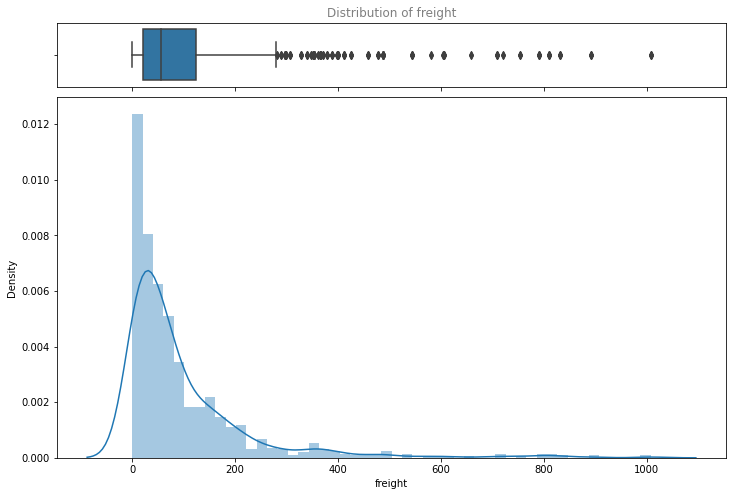

Skewness of freight: 3.2177655041937063


In [37]:
visualize_distribution(df_1, df_1.columns[10])

Dari output grafik boxplot feature freight diatas, kita temukan outliers. tidak ada tindakan untuk mengatasi outliers tersebut.

Dari grafik distplot dan value skewness, feature freight tidak terdistribusi normal (memiliki value skewness : 3.217 dan right skew / positive skew)

In [38]:
col_info(11)

index kolom : 11
nama kolom : unitprice

Unique item pada kolom
[ 14.     9.8   34.8   18.6   42.4    7.7   16.8   15.6   64.8    2.
  27.2   10.    14.4   16.     3.6   19.2    8.    15.2   13.9   44.
  26.2   10.4   35.1   17.    25.6   20.8   39.4   12.    24.    30.4
  20.7   31.2   14.7   99.    27.8   36.8   24.8   17.2    4.8   36.4
  15.5    6.2    7.3   12.4   11.2    9.6    5.9   26.6   50.    28.8
  13.6   17.6   20.    10.6    5.6  210.8   24.9    7.6    7.2   32.
  13.    10.2   22.8   77.6    4.5   18.4   45.6    7.45   9.5   32.8
  23.25  21.05  19.    28.5   49.3   15.    46.    12.75   6.    18.
 123.79   7.75  22.    30.    40.    34.    81.    38.    97.    17.45
  43.9    2.5   62.5    9.65   7.    55.   263.5   19.45  31.    12.5
  25.89  39.    26.    21.    36.    19.5   53.    13.25  31.23  21.5
   9.     9.2   33.25  25.    21.35  16.25]

Value Counts


,n_unitprice
18.0,98
10.0,68
14.0,54
12.5,54
19.0,49
...,...
22.8,3
12.4,2
10.2,2
9.8,1


Untuk data unit price, tidak bisa kita cek menggunakan value counts. kita akan cek menggunakan fungsi kedua yang telah kita buat yaitu visualize_distribution untuk melihat apakah data numerik kita ada anomali atau tidak

Stats for unitprice:


count    2082.000000
mean     26.379500  
std      30.224352  
min      2.000000   
25%      12.000000  
50%      18.400000  
75%      32.000000  
max      263.500000 
Name: unitprice, dtype: float64

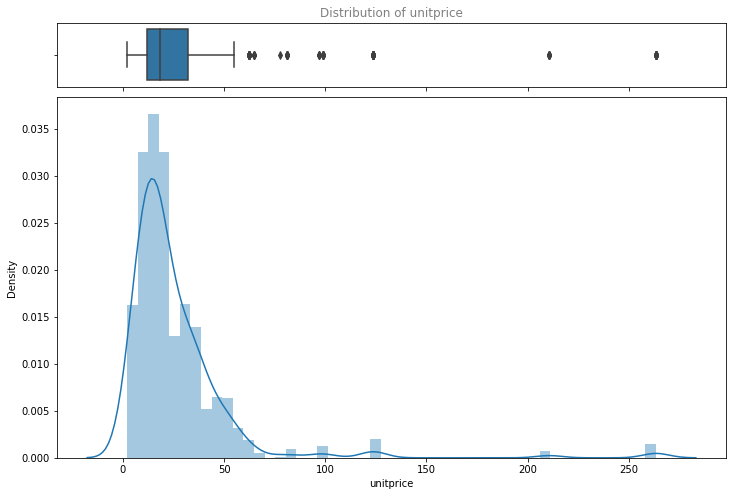

Skewness of unitprice: 5.055406591682567


In [39]:
visualize_distribution(df_1, df_1.columns[11])

Dari grafik diatas. saya akan mencoba untuk mencari data dengan unitprice lebih dari 150 karena nilai tersebut terlampau jauh dari keseluruhan data yang kita miliki

In [40]:
expensive_product = df_1[df_1["unitprice"] > 150]["productname"].unique()
expensive_product

array(['Cte de Blaye'], dtype=object)

In [41]:
df_1[df_1["productname"] == "Cte de Blaye"]

,orderid,companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipcountry,freight,unitprice,quantity,unitsinstock,unitsonorder,reorderlevel,discontinued,deliv_by
218,10329,Split Rail Beer & Ale,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-10-15,1996-11-26,1996-10-23,Lander,USA,191.67,210.8,20,17,0,15,0,United Package
274,10351,Ernst Handel,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-11-11,1996-12-09,1996-11-20,Graz,Austria,162.33,210.8,20,17,0,15,0,Speedy Express
281,10353,Piccolo und mehr,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-11-13,1996-12-11,1996-11-25,Salzburg,Austria,360.63,210.8,50,17,0,15,0,Federal Shipping
300,10360,Blondesddsl pre et fils,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-11-22,1996-12-20,1996-12-02,Strasbourg,France,131.70,210.8,10,17,0,15,0,Federal Shipping
331,10372,Queen Cozinha,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1996-12-04,1997-01-01,1996-12-09,Sao Paulo,Brazil,890.78,210.8,40,17,0,15,0,United Package
449,10417,Simons bistro,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-01-16,1997-02-13,1997-01-28,Kobenhavn,Denmark,70.29,210.8,50,17,0,15,0,Federal Shipping
471,10424,Mre Paillarde,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-01-23,1997-02-20,1997-01-27,Montral,Canada,370.61,210.8,49,17,0,15,0,United Package
613,10479,Rattlesnake Canyon Grocery,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-03-19,1997-04-16,1997-03-21,Albuquerque,USA,708.95,210.8,30,17,0,15,0,Federal Shipping
713,10518,Tortuga Restaurante,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-04-25,1997-05-09,1997-05-05,Mexico D.F.,Mexico,218.15,263.5,15,17,0,15,0,United Package
782,10540,QUICK-Stop,Cte de Blaye,Beverages,"Soft drinks, coffees, teas, beers, and ales",1997-05-19,1997-06-16,1997-06-13,Cunewalde,Germany,1007.64,263.5,30,17,0,15,0,Federal Shipping


Setelah kita selidiki, productname dengan unitprice > 150 hanya Cte de Blaye dan konsisten dengan harga yang cenderung "tinggi". Selain itu secara distribusi data masih bisa diterima karena ada kecenderungan untuk produk dengan harga yang relatif murah tentu jumlah pembeliannya akan signifikan lebih banyak dibandingkan dengan produk dengan harga mahal. 

Dari output grafik boxplot feature unitprice diatas, kita temukan outliers. tidak ada tindakan untuk mengatasi outliers tersebut. akan saya lanjutkan ke feature selanjutnya.

Dari grafik distplot dan value skewness, feature unitprice tidak terdistribusi normal (memiliki value skewness : 5.05 dan right skew / positive skew)

In [42]:
col_info(12)

index kolom : 12
nama kolom : quantity

Unique item pada kolom
[ 12  10   5   9  40  35  15   6  20  25  42  21  30  50  65   1  16   2
  60  28  36  70   4  24  33   7   8  18   3  45 100  14  80  48  56  13
  77  54  55  32 120  49  90  39  84  11 110  27  44 130  52  91  66  63]

Value Counts


,n_quantity
20,243
30,191
10,174
15,166
40,111
12,90
6,87
25,80
50,75
35,70


Stats for quantity:


count    2082.000000
mean     24.072526  
std      18.890082  
min      1.000000   
25%      10.000000  
50%      20.000000  
75%      30.000000  
max      130.000000 
Name: quantity, dtype: float64

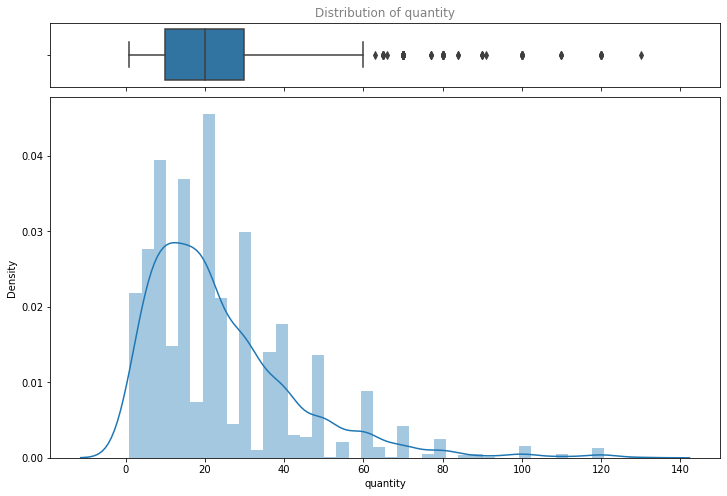

Skewness of quantity: 1.748171926223169


In [43]:
visualize_distribution(df_1, df_1.columns[12])

Pada penjelasan sebelumnya, telah saya state ada kecenderungan untuk produk dengan harga yang relatif murah tentu jumlah pembeliannya akan signifikan lebih banyak dibandingkan dengan produk dengan yang harganya mahal. 

Dari output grafik boxplot feature quantity diatas, kita temukan outliers. tidak ada tindakan untuk mengatasi outliers tersebut.

Dari grafik distplot dan value skewness, feature quantity tidak terdistribusi normal (memiliki value skewness : 1.748 dan right skew / positive skew)

In [44]:
col_info(13)

index kolom : 13
nama kolom : unitsinstock

Unique item pada kolom
[ 22  26  14  35  20  85  76 104  36  40 112  19   0  69  10 115   4  17
  29  79  32  49   9   3  11  15  21  86 123  57  31  24  27 101 125  25
  39  52 111  95   6  13  42  53 120  62  38  61  65   5 113]

Value Counts


,n_unitsinstock
0,157
17,139
26,132
20,122
15,103
21,85
22,65
112,61
79,54
24,54


Stats for unitsinstock:


count    2082.000000
mean     39.762728  
std      36.062315  
min      0.000000   
25%      17.000000  
50%      25.000000  
75%      57.000000  
max      125.000000 
Name: unitsinstock, dtype: float64

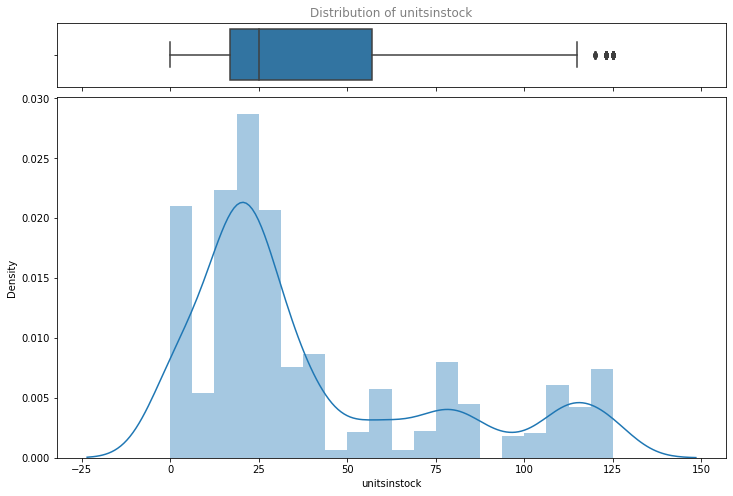

Skewness of unitsinstock: 1.1085600489081466


In [45]:
visualize_distribution(df_1, df_1.columns[13])

Dari output grafik boxplot feature unitsinstock diatas, kita temukan outliers. tidak ada tindakan untuk mengatasi outliers tersebut.

Dari grafik distplot dan value skewness, feature unitinstock tidak terdistribusi normal (memiliki value skewness : 1.108 dan right skew / positive skew)

In [46]:
col_info(14)

index kolom : 14
nama kolom : unitsonorder

Unique item pada kolom
[ 30   0  70  60  20  40  50  10  80 100]

Value Counts


,n_unitsonorder
0,1651
10,149
40,91
70,81
30,37
80,28
60,19
20,13
100,7
50,6


Stats for unitsonorder:


count    2082.000000
mean     7.949087   
std      19.569399  
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      0.000000   
max      100.000000 
Name: unitsonorder, dtype: float64

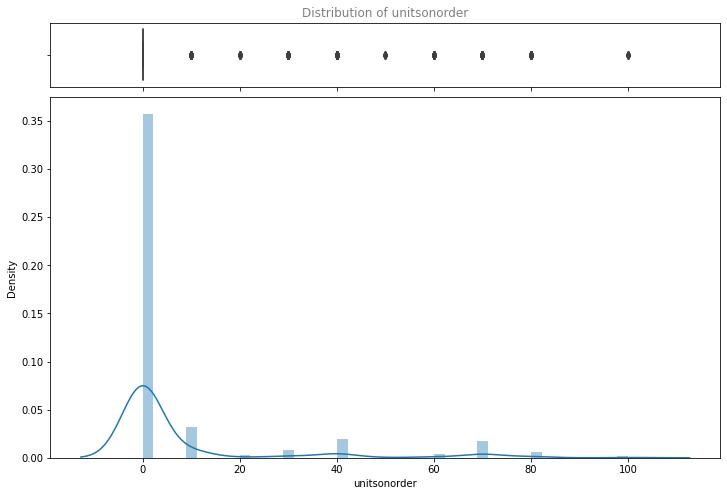

Skewness of unitsonorder: 2.6294569436118636


In [47]:
visualize_distribution(df_1, df_1.columns[14])

Dari output grafik boxplot feature unitsonorder diatas, kita temukan outliers. tidak ada tindakan untuk mengatasi outliers tersebut.

Dari grafik distplot dan value skewness, feature unitsonorder tidak terdistribusi normal (memiliki value skewness : 2.629 dan right skew / positive skew)

In [48]:
col_info(15)

index kolom : 15
nama kolom : reorderlevel

Unique item pada kolom
[30  0 10 25 20  5 15]

Value Counts


,n_reorderlevel
0,696
15,266
25,243
10,231
30,230
20,228
5,188


Stats for reorderlevel:


count    2082.000000
mean     11.899616  
std      10.804097  
min      0.000000   
25%      0.000000   
50%      10.000000  
75%      20.000000  
max      30.000000  
Name: reorderlevel, dtype: float64

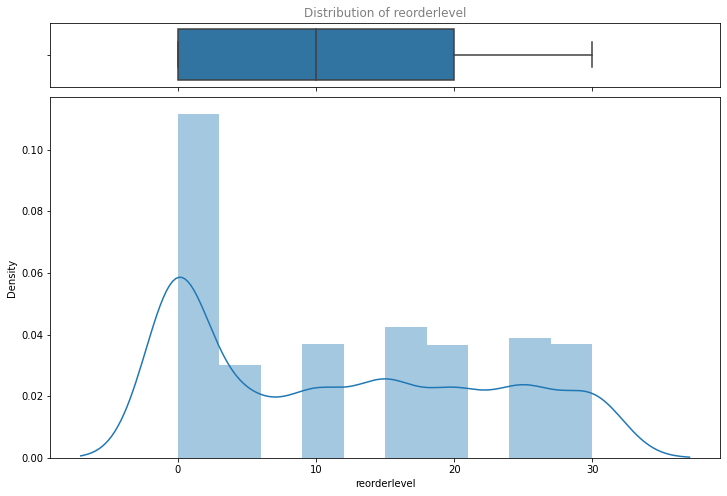

Skewness of reorderlevel: 0.3061514807139956


In [49]:
visualize_distribution(df_1, df_1.columns[15])

Dari informasi mengenai feature unitsinstock diatas, tidak ditemukan anomali. akan saya lanjutkan ke feature selanjutnya.

Dari grafik distplot dan value skewness, feature reorderlevel tidak terdistribusi normal (memiliki value skewness : 0.306 dan right skew / positive skew)

Dari value counts untuk reorder level, didominasi oleh 0. yaitu yang tidak melakukan reorder. Selebihnya dapat melihat dataframe value counts diatas.

In [50]:
col_info(16)

index kolom : 16
nama kolom : discontinued

Unique item pada kolom
[0 1]

Value Counts


,n_discontinued
0,1861
1,221


feature discontinued diatas, menginformasikan apakah product sudah diberhentikan atau tidak diproduksi lagi. untuk 0 menginformasikan bahwa produk belum discontinue, untuk 1 produk sudah discontinue. Untuk Analisa Machine learning, bentuk data ini sudah tepat. tapi mungkin untuk data analisis dan kemudahan dalam pemahaman informasi, ada baiknya kita ganti ke data kategorikal "YES" untuk 1 dan "NO" untuk 0.

In [51]:
df_1["discontinued"].replace(0, "No", inplace = True)
df_1["discontinued"].replace(1, "Yes", inplace = True)

In [52]:
col_info(17)

index kolom : 17
nama kolom : deliv_by

Unique item pada kolom
['Federal Shipping' 'Speedy Express' 'United Package']

Value Counts


,n_deliv_by
United Package,812
Speedy Express,636
Federal Shipping,634


Dari informasi mengenai feature deliv_by diatas, tidak ditemukan anomali. Paket terbanyak diantarkan oleh United Package.

# **4_DATA INSIGHT (DATA VISUALIZATION, STATISTICS)**
DATA VISUALIZATION
* CAN USE TABLEAU OR PYTHON FOR DAT. VIZ
* WHY USING THE TOOLS YOU’RE USING
* INSIGHT / STORY / ANY INFORMATION TO EXPLAIN THE GRAPH TO SOLVE THE PROBLEM

STATISTICS
* COMPARING VALUE / PROPORTION WITH SUITABLE METHOD
* RELATIONSHIP BETWEEN FOCUS ANALYSIS WITH OTHER VARIABELS
* INSIGHT FROM DESCRIPTIVE STATISTIC TEST & INFERENTIAL STATISTIC TO SOLVE THE PROBLEM

Bagian ini saya awali dengan menambahkan informasi total sales terlebih dahulu. Informasi ini bisa didapatkan dari unitprice * quantity. feature total sales ditambahkan setelah quantity.

In [53]:
df_1.insert(13, "total_sales", value = df_1["unitprice"] * df_1["quantity"])
df_1.head(3)

,orderid,companyname,productname,categoryname,description,orderdate,requireddate,shippeddate,shipcity,shipcountry,freight,unitprice,quantity,total_sales,unitsinstock,unitsonorder,reorderlevel,discontinued,deliv_by
0,10248,Vins et alcools Chevalier,Queso Cabrales,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,14.0,12,168.0,22,30,30,No,Federal Shipping
1,10248,Vins et alcools Chevalier,Singaporean Hokkien Fried Mee,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,9.8,10,98.0,26,0,0,Yes,Federal Shipping
2,10248,Vins et alcools Chevalier,Mozzarella di Giovanni,Dairy Products,Cheeses,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,34.8,5,174.0,14,0,0,No,Federal Shipping


## 4_1_PRODUCT
**Product Analysis 1 -- Kategori item yang paling sering dibeli dan kenapa ?**
<br>

1. Saya ingin tahu kategori item apa saja yang paling sering dibeli dari segi : 
>* jumlah n kali pembelian
>* quantity pembelian
>* total sales

2. saya juga ingin mengetahui produk terlaris saja apa yang dibeli dari kategori item tersebut. 

Untuk menemukan hal tersebut saya mulai dari membuat dataframe berisikan informasi yang relevan saja.

In [54]:
quo4 = df_1.groupby("categoryname").agg({"categoryname" : "count", "quantity" : "sum", "total_sales" : "sum"})
quo4.rename(columns = {
    "categoryname" : "n_transaction",
    "quantity" : "qty_total",
    "total_sales" : "cumm_total_sales"}, inplace = True)

quo4 = quo4.reset_index()
quo4.sort_values(by = ["cumm_total_sales", "qty_total", "n_transaction"], ascending = False, inplace = True)
quo4

,categoryname,n_transaction,qty_total,cumm_total_sales
0,Beverages,389,9210,280582.95
3,Dairy Products,355,8997,247766.50
5,Meat/Poultry,169,4155,177195.80
2,Confections,324,7742,174295.90
7,Seafood,319,7551,140347.58
1,Condiments,207,5235,112506.75
6,Produce,128,2831,98559.55
4,Grains/Cereals,191,4398,95759.80


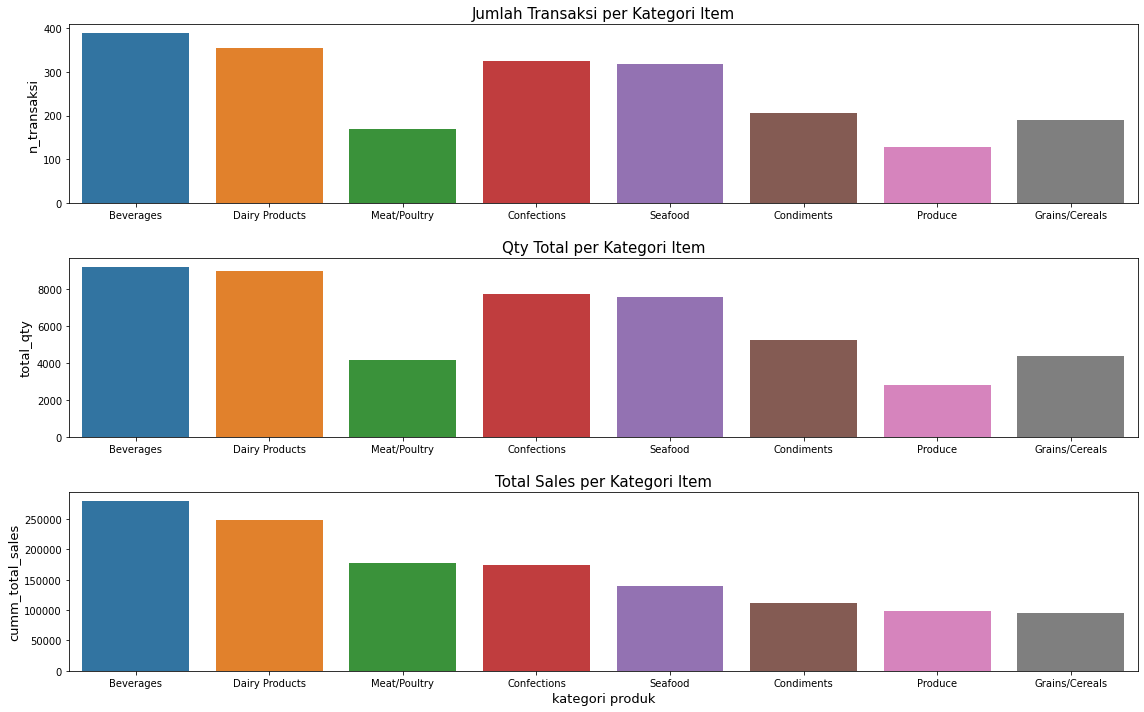

In [55]:
plt.figure(figsize = (16,10))
plt.subplot(3,1,1)
sns.barplot(data = quo4, x = "categoryname", y = "n_transaction")
plt.title("Jumlah Transaksi per Kategori Item", size = 15)
plt.ylabel("n_transaksi", size = 13)
plt.xlabel("")

plt.subplot(3,1,2)
sns.barplot(data = quo4, x = "categoryname", y = "qty_total")
plt.title("Qty Total per Kategori Item", size = 15)
plt.ylabel("total_qty", size = 13)
plt.xlabel("")

plt.subplot(3,1,3)
sns.barplot(data = quo4, x = "categoryname", y = "cumm_total_sales")
plt.title("Total Sales per Kategori Item", size = 15)
plt.xlabel("kategori produk", size = 13)
plt.ylabel("cumm_total_sales", size = 13)
plt.tight_layout(h_pad = 2)

plt.show()

**Resume Barchart** : 
1. Dari Grafik diatas. dapat dilihat bahwa untuk ranking tertinggi baik dari jumlah transaksi, total quantity pembelian dan total sales ada pada kateogri Beverages dan Dairy Products
2. Dari segi jumlah transaksi dan total quantity pembelian, kategori confections dan seafood seharusnya mendominasi juga dari sisi total sales. tapi hal ini tidak terjadi. dari segi total sales, Meat/Poultry lebih baik dari Confections dan Seafood. 
3. Untuk kategori Condiments, Produce dan Grains / Cereals kurang lebih relatif sama dari segi total sales. dari segi jumlah transaksi dan total quantity pembelian Condiments > Grains/Cereals > Produce
4. Diasumsikan bahwa untuk unit price dari Meat/Poultry lebih tinggi dibandingkan dengan Confections dan Seafood, sehingga meskipun penjualannya sedikit, dari segi total sales, Meat/Poultry bisa mengungguli produk kategori Confections dan Seafood

Saya ingin mencari tahu kenapa Beverages dan Dairy Products memiliki total sales tertinggi. Untuk mencari tahu informasi tersebut. saya dibantu dengan tools visualisasi TABLEAU untuk melihat proporsi purchasing yang dilakukan. besar purchase yang dilakukan client akan saya sederhanakan menggunakan tujuan pengiriman. disini saya asumsikan bahwa tujuan pengiriman merupakan alamat client yang dituju. 

Untuk informasi besar purchasing yang dilakukan tiap Negara dan tiap Client, outputnya baik secara tabulasi ataupun secara grafis diberikan sebagai berikut

In [56]:
%%html
<div class='tableauPlaceholder' id='viz1648527513728' style='position: relative'><noscript><a href='#'><img alt='Purchased Category for Each ClientSort By Company : AllSort By Category : All ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;ClientEachCategory&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ChapstoneII-DataAnalysis&#47;ClientEachCategory' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;ClientEachCategory&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648527513728');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [57]:
%%html
<div class='tableauPlaceholder' id='viz1648477801957' style='position: relative'><noscript><a href='#'><img alt='What Client Buy ? Which Company to Show ? : AllWhat Category to Show ? : Beverages ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;WhatClientBuy-Processed&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ChapstoneII-DataAnalysis&#47;WhatClientBuy-Processed' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;WhatClientBuy-Processed&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648477801957');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [58]:
%%html
<div class='tableauPlaceholder' id='viz1648472701658' style='position: relative'><noscript><a href='#'><img alt='Purchased Category for Each Country ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;WorldClientEachCategory&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ChapstoneII-DataAnalysis&#47;WorldClientEachCategory' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;WorldClientEachCategory&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648472701658');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [59]:
%%html
<div class='tableauPlaceholder' id='viz1648474296610' style='position: relative'><noscript><a href='#'><img alt='DB - World Client ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;DB-WorldClient&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ChapstoneII-DataAnalysis&#47;DB-WorldClient' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;DB-WorldClient&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648474296610');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='300px';vizElement.style.maxWidth='900px';vizElement.style.width='100%';vizElement.style.minHeight='447px';vizElement.style.maxHeight='1027px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='300px';vizElement.style.maxWidth='900px';vizElement.style.width='100%';vizElement.style.minHeight='447px';vizElement.style.maxHeight='1027px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='927px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [60]:
n_company = len(df_1["companyname"].unique())
n_company_bev = len(df_1[df_1["categoryname"] == "Beverages"]["companyname"].unique())
n_company_dp = len(df_1[df_1["categoryname"] == "Dairy Products"]["companyname"].unique())
                   
print("jumlah perusahaan total", n_company)
print("jumlah perusahaan yang memesan beverages", n_company_bev)
print("jumlah perusahaan yang memesan dairy milk", n_company_dp)

jumlah perusahaan total 89
jumlah perusahaan yang memesan beverages 83
jumlah perusahaan yang memesan dairy milk 81


**Resume TABLEAU** : 
1. Tabulasi dan grafik diatas ingin menunjukan dominasi pembelian produk kategori Beverages dan Dairy Products dari sudut pandang client company dan negara tujuan shipping (atau negara asal client). Mengapa total sales untuk Beverages dan Dairy Products besar ? akan dibahas pada point 2, 3 dan 4
<br>

2. 83 dari 89 perusahaan yang terdaftar pada database membeli produk beverages. Proporsi pembelian perusahaan ini juga sangat besar (agar merujuk treemap & heatmap)
>* perusahaan dengan purchasing terbesar untuk beverages yaitu QuickStop (Total Purchase : 117.483) membeli produk beverages sebesar 32.58% dari total Purchase. 
>* Contoh lainnya yaitu Hanari Carnes (Total Purchase : 34101) dan Great Lakes Food Market (Total Purchase : 19001), meskipun total Purchase mereka tidak sebesar perushaaan Quickstop, tapi purchase mereka untuk item Beverages bisa mencapai 60% dari total Purchasing yang mereka lakukan.
<br>

3. Prinsip yang sama juga berlaku pada produk dairy products. 81 dari 89 perusahaan yang terdaftar pada database membeli product dairy product dengan proporsi yang besar dibandingkan dengan pembelian kategori lain.
>* diberikan 1 contoh perusahaan dengan purchasing terbesar untuk produk dairy products yaitu QuickStop (Total Purchase : 103115) membeli produk beverages sebesar 25.39% dari total Purchase dan lain sebagainya
<br>

4. Untuk overall pembelian saya rekapitulasi menggunakan ship region (disini saya asumsikan bahwa ship region merupakan daerah asal client). Dari heatmap itu bisa dilihat untuk proporsi pembelian setiap item per Negaranya dengan lebih sederhana (bila dibandingkan per company). Dari tabel ini terlihat dengan jelas, proporsi dan jumlah pembelian tiap item dikategorinya. 
<br>

5. Untuk plot world map kiri menunjukan keseluruhan shipping seluruh kategori produk yang dilakukan perusahaan ke negara tujuan, untuk plot world map kanan menunjukan keseluruhan shipping untuk produk beverages dan dairy products ke negara tujuan. Jika kita lihat, peta sebelah kiri dengan peta sebelah kanan sama. Artinya, setiap ada pengiriman ke negara - negara tersebut, pasti ada produk beverages dan dairy products.

**Product Analysis 2 -- Correlation between n_transaction vs Qty total vs cummulative_total_sales**
<br>
pada bagian ini saya ingin mengetahui hubungan antara jumlah transaksi, jumlah pembelian dan transaksi kumulatif total. saya coba plotkan datanya terlebiih dahulu menggunakan pairplot.

<Figure size 864x864 with 0 Axes>

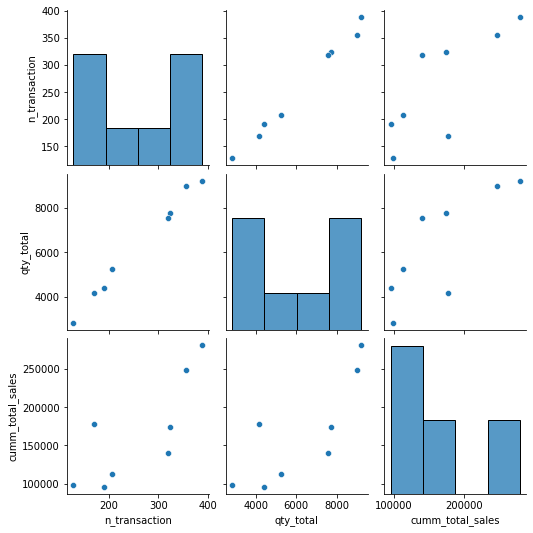

In [61]:
plt.figure(figsize = (12,12))
# membuat pairplot
sns.pairplot(quo4)
plt.show()

Dari Grafik Pairplot, diindikasikan ada hubungan antara jumlah transaksi, total qty pembelian dan cummulative total sales. Untuk mendapatkan seberapa besar korelasi antara variabel tersebut, dilanjutkan dengan pemeriksaan korelasi. Untuk pemeriksaan korelasi, saya akan menggunakan metode spearman karena jumlah data yang tersedia sedikit.

In [62]:
# menghitung kuat korelasi
quo4.corr(method = "spearman")

,n_transaction,qty_total,cumm_total_sales
n_transaction,1.000000,1.000000,0.714286
qty_total,1.000000,1.000000,0.714286
cumm_total_sales,0.714286,0.714286,1.000000


Dari hasil pemeriksaan korelasi dengan menggunakan metode spearman :
* ada korelasi yang sangat kuat (nilai korelasi = 1) antara jumlah transaksi dan total quantity pembelian.
* ada korelasi yang sangat kuat (nilai korelasi = 0.7143) antara cummulative total sales, jumlah transaksi dan qty total.

**Product Analysis 3 -- Hypothesis testing antara produk kategori meat/poultry dengan confections & seafood**
<br>
Dari analisa yang telah dilakukan sebelumnya. kita dapati bahwa meskipun quantity dan jumlah transaksi untuk produk **meat/poultry** tidak sebesar **confections dan seafood**, saya dapati bahwa untuk total sales **meat/poultry** lebih besar dari kedua produk tersebut. (hasil analisa saya recall kembali) 
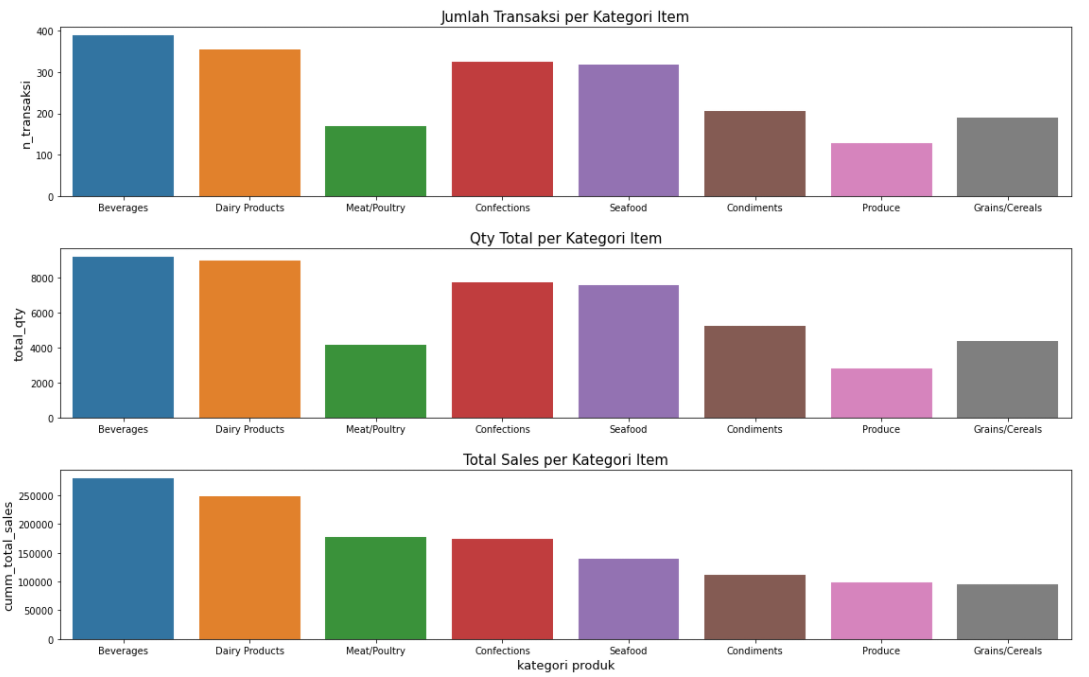

Untuk membuktikan hal tersebut saya akan melakukan hipotesis testing untuk produk kategori Meat/Poultry, Confections dan Seafood. 

**Hipotesa**:
<br>
H0 : rerata sales meat/poultry <= rerata sales confections 
<br>
H0 : rerata sales meat/poultry <= rerata sales seafood
<br>
Ha : rerata sales meat/poultry > rerata sales confections
<br>
Ha : rerata sales meat/poultry > rerata sales seafood

Untuk melakukan uji hipotesa, ada beberapa hal yang perlu dilakukan diantaranya : 
* mengetahui data apakah terdistribusi normal atau tidak
* melakukan uji hipotesa berdasarkan hasil distribusi. Hasil distribusi akan menentukan jenis uji hipotesa yang akan digunakan
* mengambil kesimpulan.

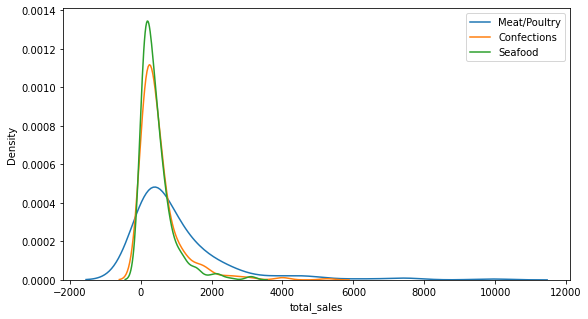

,ks_test_pval,shapiro_test_pval
Meat/Poultry,0.0,2.033786e-18
Confections,0.0,1.608196e-24
Seafood,0.0,1.227746e-21


In [63]:
# pengujian distribusi normal dengan metode grafis & frequentist
ks_p_value_comp = []
shapiro_comp = []
feature_comp = []
category = ["Meat/Poultry", "Confections", "Seafood"]

plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
for i in category :
    # untuk membuat grafik distirbusi dari total sales dari range category
    sns.distplot(df_1[df_1["categoryname"] == i]["total_sales"], hist = False, label = i)
    
    # feature compilation
    feature_comp.append(i)
    
    # uji statistik dengan kolmogorofsmirnov
    ks_statistic, ks_pvalue = kstest(df_1[df_1["categoryname"] == i]["total_sales"], "norm")
    # hasilnya pengujian KS disimpan pada sebuah list yang kita buat sebelumnya
    ks_p_value_comp.append(ks_pvalue)
    
    # uji statistik dengan shapirowilk
    sw_statistic, sw_pvalue = shapiro(df_1[df_1["categoryname"] == i]["total_sales"])
    # hasilnya pengujian shapiro wilk disimpan pada sebuah list yang kita buat sebelumnya
    shapiro_comp.append(sw_pvalue)
    
plt.legend()
plt.show()

# hasil pengujian statistik dikompilasi ke dalam suatu dataframe
pd.DataFrame({
    "ks_test_pval" : ks_p_value_comp,
    "shapiro_test_pval" : shapiro_comp},
    index = feature_comp)

**Pengujian Normalitas Data**
<br>
Dari hasil uji yang telah kita lakukan dengan metode frequentist dan grafis, untuk data total sales produk meat/poultry, confections dan seafood tidak terdistribusi normal

Dari grafik terlihat bahwa grafik cenderung skew ke kanan atau positive skew, untuk dari hasil test frequentist menggunakan kolgomorof smirnof dan shapiro wilk didapati nilai pvalue < 0.05, yang artinya data kita tidak terdistribusi normal

Karena hasil uji kenormalan data tidak terdistribusi normal, maka untuk pengujian hipotesa menggunakan uji non parameterik. Uji non parametrik yang digunakan adalah uji Mann Whitney.

kita akan mengecek hipotesa menggunakan Mann Whitney. Mengapa kita menggunakan Mann Whitney ? 
<br>
a. karena data total_sales yang kita miliki diasumsikan tidak terdistribusi normal
<br>
b. Jumlah kategori yang ingin dibandingkan ada 2, yaitu total sales kategori "Meat/Poultry" dan kategori "Confections" (& Seafood, uji akan dilakukan 2 kali)
<br>
b. data kita merupakan data numerik
<br>
c. data dikumpulkan secara random
<br>
d. uji ini kita gunakan untuk mencari median populasi

**Hipotesa**:
<br>
H0 : rerata sales meat/poultry <= rerata sales confections 
<br>
H0 : rerata sales meat/poultry <= rerata sales seafood
<br>
Ha : rerata sales meat/poultry > rerata sales confections
<br>
Ha : rerata sales meat/poultry > rerata sales seafood

In [64]:
# menguji hipotesa
result = list(mannwhitneyu(
            df_1[df_1["categoryname"] == "Meat/Poultry"]["total_sales"], 
            df_1[df_1["categoryname"] == "Confections"]["total_sales"],
            alternative = "greater")) # sesuai hipotesa, meat poultry > confections
print("U - Statistic", result[0])
print("P - Value", result[1])

# output hipotesa berdasrkan p valuenya
if result[1] < 0.05 :
    print(f"\nTolak H0 Karena P-Value ({result[1]} < 0.05)")
    print("Kita memiliki cukup bukti untuk menunjukan bahwa rerata sales kategori meat/poultry > rerata sales kategori Confections")
else :
    print(f"\nTerima H0 Karena P-Value ({result[1]} > 0.05)")
    print("Kita TIDAK memiliki cukup bukti untuk menunjukan bahwa rerata sales kategori meat/poultry > rerata sales kategori Confections")
    print("rerata sales kategori meat/poultry <= rerata sales kategori Confections")

U - Statistic 33143.0
P - Value 6.163346100620913e-05

Tolak H0 Karena P-Value (6.163346100620913e-05 < 0.05)
Kita memiliki cukup bukti untuk menunjukan bahwa rerata sales kategori meat/poultry > rerata sales kategori Confections


In [65]:
result = list(mannwhitneyu(
            df_1[df_1["categoryname"] == "Meat/Poultry"]["total_sales"],
            df_1[df_1["categoryname"] == "Seafood"]["total_sales"], # sesuai hipotesa, meat poultry > seafood
            alternative = "greater"))
print("U - Statistic", result[0])
print("P - Value", result[1])

# output hipotesa berdasrkan p valuenya
if result[1] < 0.05 :
    print(f"\nTolak H0 Karena P-Value ({result[1]} < 0.05)")
    print("Kita memiliki cukup bukti untuk menunjukan bahwa rerata sales kategori meat/poultry > rerata sales kategori Seafood")
else :
    print(f"\nTerima H0 Karena P-Value ({result[1]} > 0.05)")
    print("Kita TIDAK memiliki cukup bukti untuk menunjukan bahwa rerata sales kategori meat/poultry > rerata sales kategori Seafood")
    print("rerata sales kategori meat/poultry <= rerata sales kategori Seafood")

U - Statistic 34561.0
P - Value 1.4409609648428563e-07

Tolak H0 Karena P-Value (1.4409609648428563e-07 < 0.05)
Kita memiliki cukup bukti untuk menunjukan bahwa rerata sales kategori meat/poultry > rerata sales kategori Seafood


**Kesimpulan**:
<br>
Dari hasil uji hipotesa yang telah dilakukan. didapati bahwa : 
* total sales untuk produk kategori meat/poultry > total sales produk kategori Confections
* total sales untuk produk kategori meat/poultry > total sales produk kategori Seafood

Dari output ini didapat insight bahwa ada case dimana total sales tidak selalu inline dengan jumlah transaksi terbanyak ataupun total quantity terjual

**Product Analysis 4 -- Most Bought *goods*, General Information for Prospective Buyer**
<br>
Di akhir saya ingin mendapatkan 3 *top goods* (productname) yang paling laris dari masing - masing kategori dan range harganya untuk kategori tersebut. Informasi ini dapat diberikan ke calon konsumen untuk memberikan gambaran mengenai kategori, top *goods* yang tersedia ditiap kategori dan rentang harganya untuk memberikan gambaran *goods* apa saja yang bisa disediakan perusahaan.

In [66]:
category_name = []
product_name = []
price_range = []

for i in df_1.categoryname.unique():
    # kompilasi cateogry name disimpan di dalam list
    category_name.append(i)
    
    # kompilasi makanan top 3 yang dipesan dari tiap kategorinya
    product_name.append(df_1[df_1["categoryname"] == i]["productname"].value_counts()[:3].index.values)
    
    # mengetahui nilai min dan max unit price disimpan dalam variabel
    max_price = df_1[df_1["categoryname"] == i]["unitprice"].max()
    min_price = df_1[df_1["categoryname"] == i]["unitprice"].min()
    pr = str(min_price), " - ", str(max_price)
    
    # kompilasi price range disimpan di dalam list
    price_range.append(pr)
    
pd.DataFrame({
    "product name sample" : product_name,
    "price range" : price_range},
    index = category_name)
    

,product name sample,price range
Dairy Products,"[Raclette Courdavault, Gorgonzola Telino, Camembert Pierrot]","(2.0, - , 55.0)"
Grains/Cereals,"[Gnocchi di nonna Alice, Singaporean Hokkien Fried Mee, Wimmers gute Semmelkndel]","(5.6, - , 38.0)"
Produce,"[Manjimup Dried Apples, Rssle Sauerkraut, Uncle Bob's Organic Dried Pears]","(8.0, - , 53.0)"
Seafood,"[Jack's New England Clam Chowder, Boston Crab Meat, Konbu]","(4.8, - , 62.5)"
Condiments,"[Original Frankfurter grne Soe, Louisiana Fiery Hot Pepper Sauce, Gula Malacca]","(8.0, - , 43.9)"
Confections,"[Tarte au sucre, Pavlova, Sir Rodney's Scones]","(7.3, - , 81.0)"
Beverages,"[Guaran Fantstica, Rhnbru Klosterbier, Chang]","(3.6, - , 263.5)"
Meat/Poultry,"[Alice Mutton, Tourtire, Pt chinois]","(5.9, - , 123.79)"


Informasi ini juga berguna ketika ada calon customer bertanya produk apa yang bisa disediakan, dengan memberikan tabulasi tersebut saya rasa akan menjawab sebagian besar *curiosity* dari calon customer.

## 4_2_DATE ANALYSIS
**Date Analysis 1 -- Analisis keterlambatan**
<br>
Dari data yang diberikan ada 3 kategori tanggal yang diberikan yaitu orderdate, requireddate, shippeddate. Dari tanggal tanggal tersebut kita bisa mendapatkan beberapa informasi penting yaitu : 
* required date - orderdate --> expektasi spare waktu yang yang dimiliki customer dari order sampai barang diterima ?
* shippeddate - orderdate --> berapa lama waktu yang diperlukan dari order dipesan sampai dikirimkan ? 
* requireddate - shippeddate --> durasi waktu pengiriman yang tersedia

**saya asumsikan bahwa pada tanggal sesuai feature requireddate, *goods* telah diterima oleh customer.**

Untuk melakukan analisis tersebut saya membuat dataframe baru yang berisikan informasi yang sekiranya relevan saja dengan yang akan dianalisis sebagai berikut : 
* categoryname : untuk mengetahui kategori item apa yang dipesan
* requireddate, shippeddate, requireddate telah dijelaskan pada bagian sebelumnya
* shipcity : kota tujuan pengiriman
* shipcountry : negara tujuan pengiriman
* freight : berat kargo pengiriman
* unit price : harga satuan untuk menghitung total penjualan
* quantity : jumlah pemesanan untuk menghitung total penjualan
* totalsales : unit price dikalikan dengan quantity
* deliv by : pilihan jasa pengirmian ekspedisi

In [67]:
# membuat dataframe baru dengan informasi yang relevan saja untuk dianalisis
quo_4_3 = df_1[["categoryname", "orderdate", "requireddate", "shippeddate", "shipcity", "shipcountry", "freight", "unitprice", "quantity", "deliv_by"]]
quo_4_3

,categoryname,orderdate,requireddate,shippeddate,shipcity,shipcountry,freight,unitprice,quantity,deliv_by
0,Dairy Products,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,14.00,12,Federal Shipping
1,Grains/Cereals,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,9.80,10,Federal Shipping
2,Dairy Products,1996-07-04,1996-08-01,1996-07-16,Reims,France,32.38,34.80,5,Federal Shipping
3,Produce,1996-07-05,1996-08-16,1996-07-10,Munster,Germany,11.61,18.60,9,Speedy Express
4,Produce,1996-07-05,1996-08-16,1996-07-10,Munster,Germany,11.61,42.40,40,Speedy Express
...,...,...,...,...,...,...,...,...,...,...
2103,Confections,1998-05-01,1998-05-29,1998-05-04,Seattle,USA,44.72,17.45,3,United Package
2104,Confections,1998-05-01,1998-05-29,1998-05-04,Seattle,USA,44.72,9.20,42,United Package
2105,Beverages,1998-05-01,1998-05-29,1998-05-04,Seattle,USA,44.72,14.00,35,United Package
2106,Seafood,1998-05-04,1998-05-18,1998-05-06,Aachen,Germany,7.98,9.65,9,United Package


Dari data diatas, saya akan menambahkan beberapa kolom baru yaitu : 
* date_1_cust : expektasi waktu tunggu customer dari order sampai barang diterima (satuan hari)
* date_2_comp : durasi waktu dari order dipesan sampai dikirimkan (satuan hari)
* date_3_ship : durasi waktu pengiriman yang tersedia (satuan hari)

In [68]:
# menambahkan di kolom index ke 4 untuk date_1_cust atau waktu tunggu customer
quo_4_3.insert(4,"date_1_cust",(quo_4_3["requireddate"] - quo_4_3["orderdate"]).dt.days)

# menambahkan di kolom index ke 5 untuk date_2_comp atau waktu packing / persiapan shipping
quo_4_3.insert(5,"date_2_comp",(quo_4_3["shippeddate"] - quo_4_3["orderdate"]).dt.days)

# menambahkan di kolom index ke 6 untuk date_3_ship atau waktu yang dimiliki ekspedisi untuk kirim barang
quo_4_3.insert(6,"date_3_ship",(quo_4_3["requireddate"] - quo_4_3["shippeddate"]).dt.days)

# mengeluarkan dataframe yang sudah ditambahkan informasi diatas
quo_4_3

,categoryname,orderdate,requireddate,shippeddate,date_1_cust,date_2_comp,date_3_ship,shipcity,shipcountry,freight,unitprice,quantity,deliv_by
0,Dairy Products,1996-07-04,1996-08-01,1996-07-16,28,12,16,Reims,France,32.38,14.00,12,Federal Shipping
1,Grains/Cereals,1996-07-04,1996-08-01,1996-07-16,28,12,16,Reims,France,32.38,9.80,10,Federal Shipping
2,Dairy Products,1996-07-04,1996-08-01,1996-07-16,28,12,16,Reims,France,32.38,34.80,5,Federal Shipping
3,Produce,1996-07-05,1996-08-16,1996-07-10,42,5,37,Munster,Germany,11.61,18.60,9,Speedy Express
4,Produce,1996-07-05,1996-08-16,1996-07-10,42,5,37,Munster,Germany,11.61,42.40,40,Speedy Express
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,Confections,1998-05-01,1998-05-29,1998-05-04,28,3,25,Seattle,USA,44.72,17.45,3,United Package
2104,Confections,1998-05-01,1998-05-29,1998-05-04,28,3,25,Seattle,USA,44.72,9.20,42,United Package
2105,Beverages,1998-05-01,1998-05-29,1998-05-04,28,3,25,Seattle,USA,44.72,14.00,35,United Package
2106,Seafood,1998-05-04,1998-05-18,1998-05-06,14,2,12,Aachen,Germany,7.98,9.65,9,United Package


Setelah mendapatkan informasi diatas. saya ingin memeriksa apakah ada hubungan antara freight(berat kargo) dengan date_1_cust yang merupakan ekspektasi waktu tunggu customer dari pemesanan sampai barang diterima. Untuk mengecek hal tersebut, kita plotkan data pada scatterplot

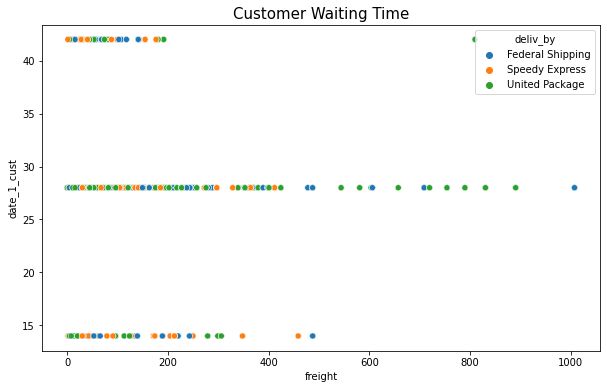

In [69]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = quo_4_3, x = "freight", y = "date_1_cust", hue = "deliv_by")
plt.title("Customer Waiting Time", size = 15)
plt.show()

grafik diatas menjelaskan feature date_1_cust yang merupakan expektasi waktu tunggu customer dari order sampai barang diterima (satuan hari). tidak banyak yang bisa saya simpulkan. tapi waktu tunggu customer dari pemesanan sampai diterima (required date) terbagi menjadi 3 bagian besar yaitu 14 hari, 28 hari dan 42 hari untuk berbagai varian kategori dan berbagai negara. tidak ada pengaruh berat kargo yang signifikan.

Artinya customer paling cepat menerima *goods* yang dipesan pada kurun waktu 14 hari dan paling lama 42 hari.

Saya lanjutkan dengan pemeriksaan selanjutnya. saya ingin mengecek berapa lama waktu yang dibutuhkan dari order diterima sampai pengiriman terjadi untuk tiap kategori *goods*. Untuk mengecek hal tersebut, kembali kita gunakan scatterplot

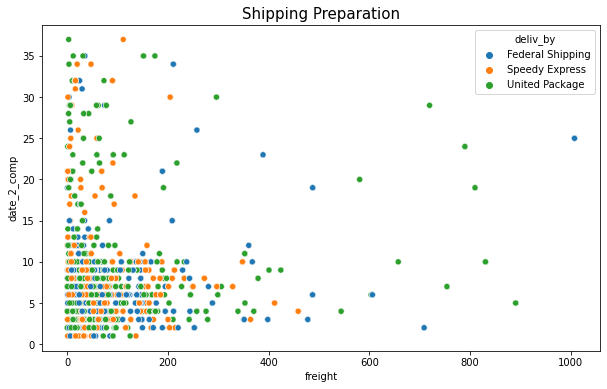

In [70]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = quo_4_3, x = "freight", y = "date_2_comp", hue = "deliv_by")
plt.title("Shipping Preparation", size = 15)
plt.show()

grafik diatas menjelaskan feature date_2_comp yang merupakan durasi waktu dari order dipesan sampai dikirimkan (satuan hari). Beberapa informasi durasi date_2_comp diberikan bada cell code dibawah ini

In [71]:
print("waktu minimum persiapan packing = ",quo_4_3["date_2_comp"].min())
print("waktu maksimum persiapan packing = ",quo_4_3["date_2_comp"].max())
print("mode waktu persiapan packing = ",quo_4_3["date_2_comp"].mode().values)
print("median waktu persiapan packing = ",quo_4_3["date_2_comp"].median())

waktu minimum persiapan packing =  1
waktu maksimum persiapan packing =  37
mode waktu persiapan packing =  [7]
median waktu persiapan packing =  7.0


Data - data untuk date_2_comp diatas dapat diketahui bahwa kebanyakan waktu persiapan barang untuk dikirimkan adalah kurang lebih 7 hari. Dari grafik yang dihasilkan masih cukup banyak data yang waktu persiapannya memakan waktu sangat lama bahkan ada yang sampai > 35 hari.

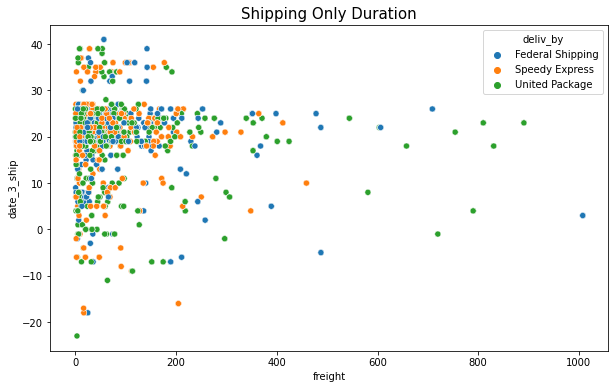

In [72]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = quo_4_3, x = "freight", y = "date_3_ship", hue = "deliv_by")
plt.title("Shipping Only Duration", size = 15)
plt.show()

grafik diatas menjelaskan feature date_3_ship : durasi waktu pengiriman yang tersedia (satuan hari). Beberapa informasi durasi date_3_ship diberikan bada cell code dibawah ini

In [73]:
print("waktu minimum yang tersedia untuk shipping = ",quo_4_3["date_3_ship"].min())
print("waktu maksimum yang tersedia untuk shipping = ",quo_4_3["date_3_ship"].max())
print("mode waktu tersedia untuk shipping = ",quo_4_3["date_3_ship"].mode().values)
print("median waktu tersedia untuk shipping = ",quo_4_3["date_3_ship"].median())

waktu minimum yang tersedia untuk shipping =  -23
waktu maksimum yang tersedia untuk shipping =  41
mode waktu tersedia untuk shipping =  [21]
median waktu tersedia untuk shipping =  21.0


Data - data untuk date_3_ship diatas dapat diketahui bahwa ada beberapa value yang bernilai negatif. Hal ini menandakan bahwa tidak cukup waktu untuk pengiriman. karena sudah due date (requireddate) tapi barang masih belum dikirimkan. 

Selain itu jika value 0 diintepretasikan juga sebenarnya tidak wajar karena selesai persiapan packing, *goods* langsung sampai di tangan konsumen. ada nilai tertentu yang dibutuhkan untuk kegiatan deliverynay saja. nilai tersebut akan kita ambil dari data yang ada berdasarkan median.

Dari beberapa analisa yang telah dilakukan diatas. kita bisa mendapatkan informasi seperti : 
* rata - rata waktu untuk shipping = 21 hari
* rata - rata persiapan barang untuk dikirimkan = 7 hari

Saya ingin mencoba mendapatkan informasi *goods* apa saja yang terlambat. 
<br>

saya asumsi bahwa agar tidak terlambat, dibutuhkan lag time (date_3_ship) sebesar 21 hari. kurang dari 21 hari, saya asumsikan terlambat

In [74]:
# mendapatkan index "goods" yang terlambat dikirim
late_shipping = quo_4_3[quo_4_3["date_3_ship"] < 21].index
print(late_shipping)
print(len(late_shipping))

Int64Index([   0,    1,    2,   14,   15,   16,   17,   18,   19,   34,
            ...
            2051, 2052, 2054, 2063, 2064, 2065, 2078, 2079, 2080, 2106],
           dtype='int64', length=868)
868


Disini saya ingin mendapatakn irisannya dengan date_2_comp. 
<br>

saya berasumsi bahwa apabila *goods* dipersiapkan lebih dari 7 hari. maka akan berpotensi terlambat.

In [75]:
# mendapatkan index "goods" yang butuh waktu lama untuk preparation.
late_preparation = quo_4_3[quo_4_3["date_2_comp"] > 7].index
print(late_preparation)
print(len(late_preparation))

Int64Index([   0,    1,    2,   17,   18,   19,   34,   35,   36,   37,
            ...
            2020, 2041, 2042, 2043, 2051, 2052, 2054, 2063, 2064, 2065],
           dtype='int64', length=838)
838


Disini saya ingin memeriksa apakah ada irisan antara waktu persiapan pengiriman yang lebih dari 7 hari dengan durasi pengiriman yang tersedia kurang dari 21 hari (diindikasikan terlambat).

In [76]:
# mencari irisan antara "goods" yang lama dipacking dan "goods" yang terlambat sampai (sesuai dengan requireddate)
count_index = 0
problem_index = []

for index in late_preparation:
    if index in late_shipping:
        count_index += 1
        problem_index.append(index)

print(count_index)

776


Disini saya ingin rekap terlebih dahulu informasi apa saja yang telah kita miliki : 
* DATA_A = ada 838 data yang menginformasikan bahwa suatu *goods* dipersiapkan lebih dari 7 hari.
* DATA_B = ada 868 data yang menginformasikan bahwa suatu *goods* diindikasikan terlambat untuk dikirimkan (butuh lag time 21 hari)

Dari hasil analisa sederhana yang kita lakukan, ada 776 data dari DATA_A yang beririsan dengan DATA_B. Disini saya intepretasikan bahwa ada potensi keterlambatan yang akan terjadi sebesar 89.4%. Jadi karena suatu *goods* dipersiapkan lebih dari 7 hari, ada kecenderungan untuk terjadi keterlambatan (karena dibutuhkan lag time 21 hari, agar *goods* tidak terlambat atau sesuai dengan requireddate). Ilustrasi irisan DATA_A dan DATA_B diberikan sebagai berikut.

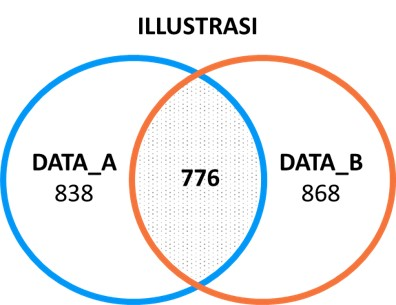

**Date Analysis 2 -- Total penjualan tiap bulannya**
<br>
Karena fokus pembahasan masih di area date time. saya ingin melihat grafik penjualan setiap bulannya baik setiap kategori ataupun kumulatif. Untuk bagian ini saya akan saya gunakan TABLEAU

In [77]:
%%html
<div class='tableauPlaceholder' id='viz1648559578332' style='position: relative'><noscript><a href='#'><img alt='Lineplot Sales Per Month ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;LineplotSalesPerMonth&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ChapstoneII-DataAnalysis&#47;LineplotSalesPerMonth' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;LineplotSalesPerMonth&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648559578332');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Legenda**
* line merah : grafik kumulatif penjualan tiap bulannya, juga diberikan komplimentari berupa trendline yang menunjukan bahwa penjualan setiap bulannya mengalami peningkatan dari rentang Juli 1996 s.d April 1998.

* line lainnya : informasi penjualan tiap bulan untuk setiap kategori produk. sudah dicolor code sesuai dengan kategori. dapat dilihat pada legenda

**Insight Grafik**
* Selalu terjadi peningkatan penjualan di bulan November - Desember - Januari untuk tahun 1996 ke 1997 dan 1997 ke 1998. Pada waktu waktu ini saya asumsikan konsumen mempersiapkan diri untuk merayakan Natal dan Tahun Baru. adanya peningkatan demand di waktu waktu tersebut berimplikasi pada peningkatan penjualan *goods* yang dijual. Jika diperhatikan juga Beverages selalu meningkat pada waktu waktu tersebut dengan proporsi penjualan yang signifikan dibandingkan dengan *goods* kategori lainnya.
* Seiring waktu penjualan terus meningkat, bisa kita bandingkan untuk penjualan di bulan Agustus 1996 dan penualan di bulan Agustus 1997. Pernyataan ini juga diperkuat dengan trendline positif yang disediakan grafik tersebut.
* bagian penurunan penjualan yang sangat signifikan pada April 1998 ke ke Mei 1998.

Grafik ini akan digunakan kembali untuk membantu analisa selanjutnya

**Date Analysis 3 -- Trend harga product tiap kategori**
<br>
Disini saya ingin melihat trend harga tiap bulannya untuk setiap produk dan setiap kategori. datanya telah kita siapkan. kita panggil terlebih dahulu datanya

In [78]:
# membuat dataframe dengan isi feature yang relevan dengan yang akan dianalisis
quo_4_4 = df_1[["orderdate", "categoryname", "productname", "freight", "unitprice", "quantity", "total_sales"]]
quo_4_4

,orderdate,categoryname,productname,freight,unitprice,quantity,total_sales
0,1996-07-04,Dairy Products,Queso Cabrales,32.38,14.00,12,168.00
1,1996-07-04,Grains/Cereals,Singaporean Hokkien Fried Mee,32.38,9.80,10,98.00
2,1996-07-04,Dairy Products,Mozzarella di Giovanni,32.38,34.80,5,174.00
3,1996-07-05,Produce,Tofu,11.61,18.60,9,167.40
4,1996-07-05,Produce,Manjimup Dried Apples,11.61,42.40,40,1696.00
...,...,...,...,...,...,...,...
2103,1998-05-01,Confections,Pavlova,44.72,17.45,3,52.35
2104,1998-05-01,Confections,Teatime Chocolate Biscuits,44.72,9.20,42,386.40
2105,1998-05-01,Beverages,Sasquatch Ale,44.72,14.00,35,490.00
2106,1998-05-04,Seafood,Jack's New England Clam Chowder,7.98,9.65,9,86.85


In [79]:
# mengextract year - month saja. karena day terlalu micro.
quo_4_4.insert(1, "year", quo_4_4["orderdate"].dt.year)
quo_4_4.insert(2, "month", quo_4_4["orderdate"].dt.month)
quo_4_4.insert(3, "year - month", quo_4_4[["year", "month"]].apply(lambda x : (f"{x['year']} - {x['month']}"), axis = 1))
quo_4_4

,orderdate,year,month,year - month,categoryname,productname,freight,unitprice,quantity,total_sales
0,1996-07-04,1996,7,1996 - 7,Dairy Products,Queso Cabrales,32.38,14.00,12,168.00
1,1996-07-04,1996,7,1996 - 7,Grains/Cereals,Singaporean Hokkien Fried Mee,32.38,9.80,10,98.00
2,1996-07-04,1996,7,1996 - 7,Dairy Products,Mozzarella di Giovanni,32.38,34.80,5,174.00
3,1996-07-05,1996,7,1996 - 7,Produce,Tofu,11.61,18.60,9,167.40
4,1996-07-05,1996,7,1996 - 7,Produce,Manjimup Dried Apples,11.61,42.40,40,1696.00
...,...,...,...,...,...,...,...,...,...,...
2103,1998-05-01,1998,5,1998 - 5,Confections,Pavlova,44.72,17.45,3,52.35
2104,1998-05-01,1998,5,1998 - 5,Confections,Teatime Chocolate Biscuits,44.72,9.20,42,386.40
2105,1998-05-01,1998,5,1998 - 5,Beverages,Sasquatch Ale,44.72,14.00,35,490.00
2106,1998-05-04,1998,5,1998 - 5,Seafood,Jack's New England Clam Chowder,7.98,9.65,9,86.85


In [80]:
# output dikerucutkan kembali informasinya dengan menggunakan pivot table
quo_4_4_5 = pd.pivot_table(
            data = quo_4_4, 
            index = ["year - month", "categoryname", "productname"], 
            values = ["unitprice"], aggfunc = "mean").reset_index()
quo_4_4_5

,year - month,categoryname,productname,unitprice
0,1996 - 10,Beverages,Chang,15.20
1,1996 - 10,Beverages,Chartreuse verte,14.40
2,1996 - 10,Beverages,Cte de Blaye,210.80
3,1996 - 10,Beverages,Ipoh Coffee,36.80
4,1996 - 10,Beverages,Lakkalikri,14.40
...,...,...,...,...
1122,1998 - 5,Confections,Teatime Chocolate Biscuits,9.20
1123,1998 - 5,Meat/Poultry,Alice Mutton,39.00
1124,1998 - 5,Meat/Poultry,Perth Pasties,32.80
1125,1998 - 5,Meat/Poultry,Pt chinois,24.00


Kita perhatikan terlebih dahulu format data yang ada pada quo_4_4_5

In [81]:
# sepertinya perlu menyesuaikan tipe data agar bisa membuat lineplot yang baik.
# disini didapatkan bahwa year - month masih object.
quo_4_4_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year - month  1127 non-null   object 
 1   categoryname  1127 non-null   object 
 2   productname   1127 non-null   object 
 3   unitprice     1127 non-null   float64
dtypes: float64(1), object(3)
memory usage: 35.3+ KB


In [82]:
# konversi dulu menjadi tipe data yang benar yaitu date time
quo_4_4_5["year - month"] = pd.to_datetime(quo_4_4_5["year - month"])
quo_4_4_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year - month  1127 non-null   datetime64[ns]
 1   categoryname  1127 non-null   object        
 2   productname   1127 non-null   object        
 3   unitprice     1127 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 35.3+ KB


Setelah year - month telah terganti ke format datetime, barubisa melakukan analisis lanjutan. saya akan mengeluarkan grafik untuk setiap productname di setiap kategori

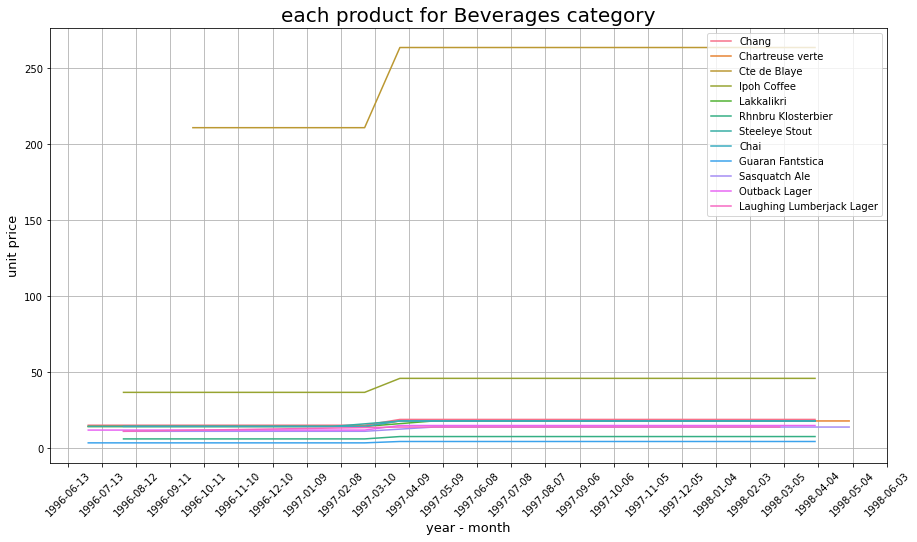

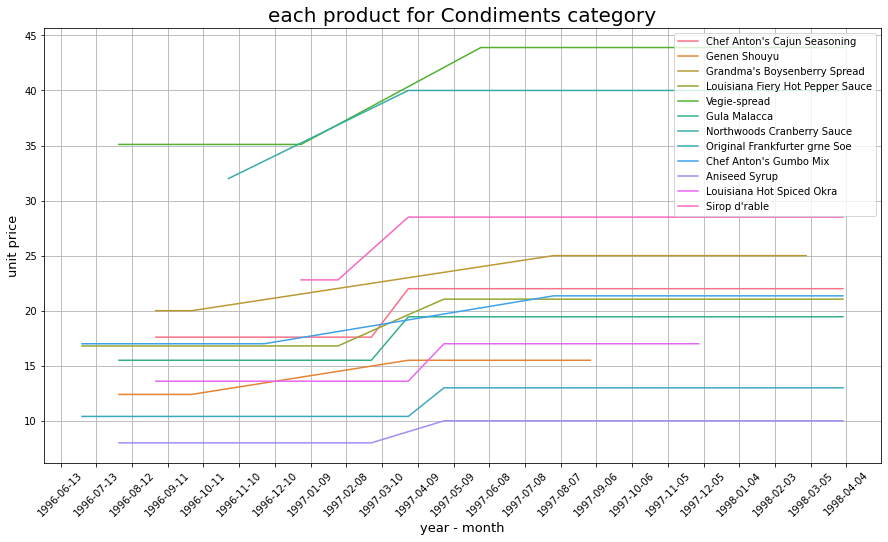

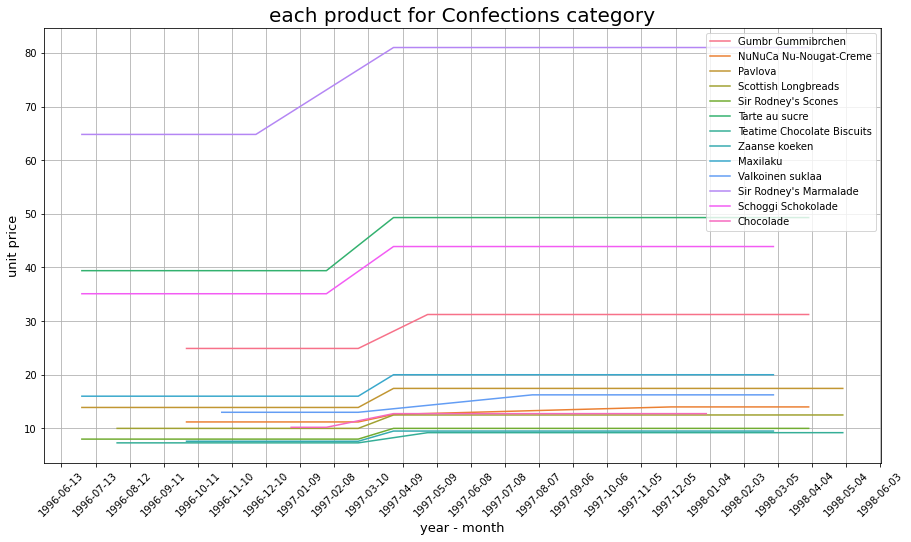

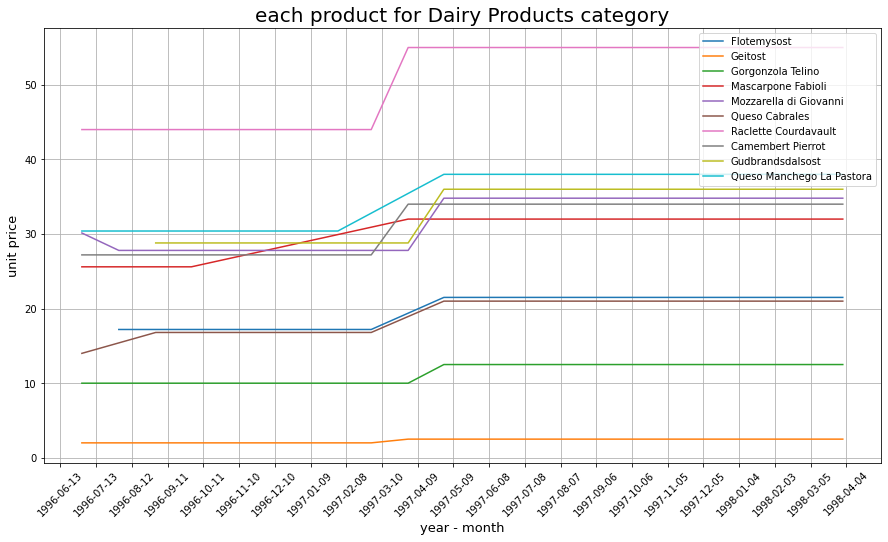

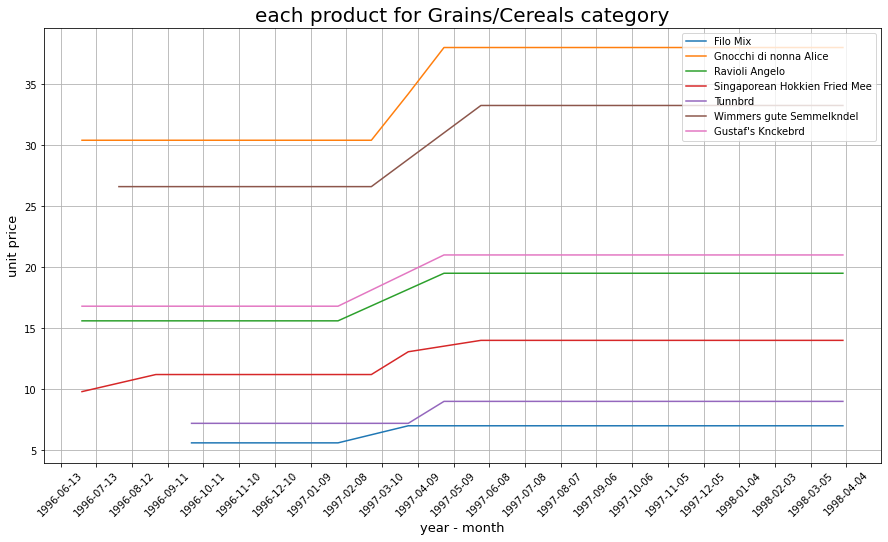

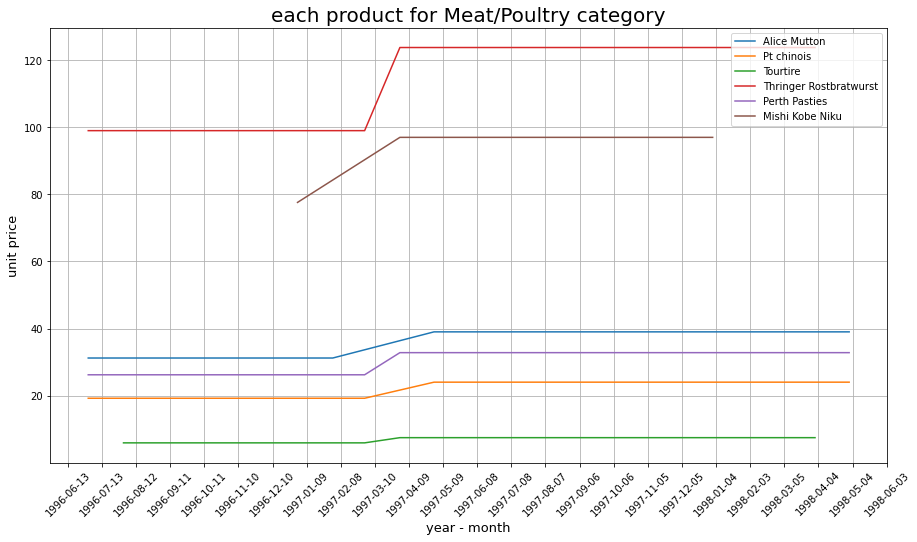

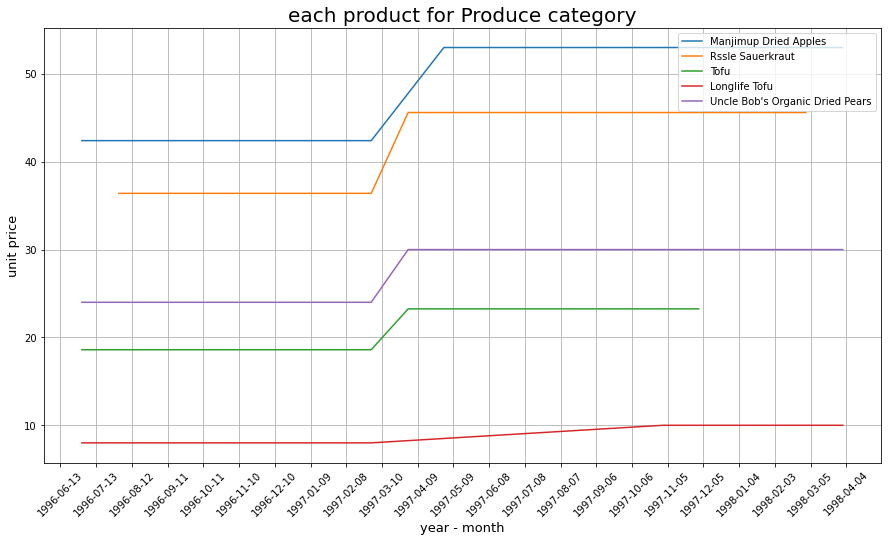

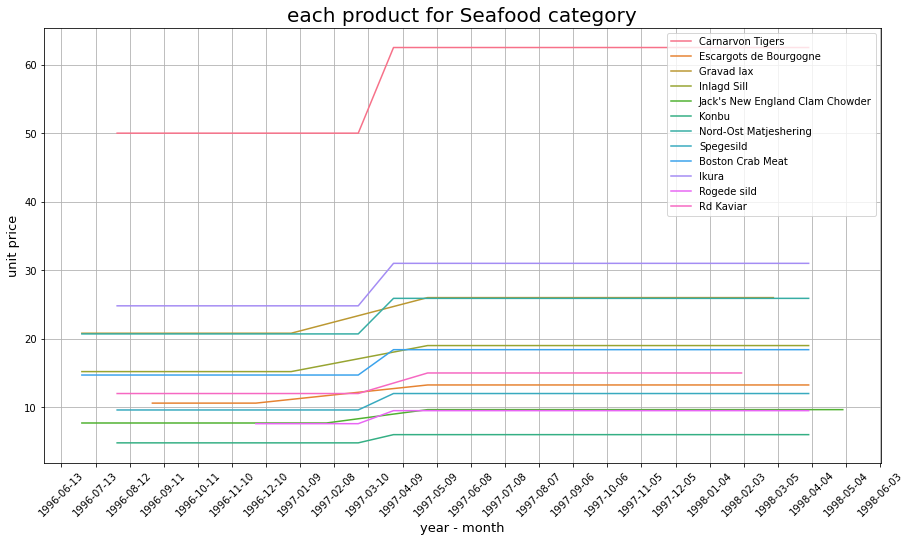

In [83]:
# menggunakan forloop untuk range kategori produk
# untuk mengeluarkan perkembangan unit price dari setiap produk, dari setiap kategori
for category in quo_4_4_5["categoryname"].unique():
    plt.figure(figsize = (15,8))
    loc = plticker.MultipleLocator(base = 30)
    model = sns.lineplot(data = quo_4_4_5[quo_4_4_5["categoryname"] == category], 
                 x =  "year - month", 
                 y = "unitprice", 
                 estimator = None,
                 hue = "productname")
    model.xaxis.set_major_locator(loc)
    plt.title(f"each product for {category} category", size = 20)
    plt.xticks(rotation = 45)
    plt.ylabel("unit price", size = 13)
    plt.xlabel("year - month", size = 13)
    plt.grid()
    plt.legend(loc = "upper right")
    plt.show()

Bila ingin fokus secara detail silahkan perhatikan grafik diatas untuk setiap kategorinya. Dari keseluruhan grafik yang ada tersebut. saya akan mengambil kesimpulan secara general:
* untuk seluruh kategori produk dan tiap produk mengalami perubahan
* Harga awal H0 (Juni 1996 s.d sekitar Pertengahan Feb - Maret 1997)
* Harga menjadi H1 (Pertengahan Maret April 1997) 
* Sebagian besar produk mengalami kenaikan harga pada waktu tersebut, ada juga beberapa produk dari kategori yang sudah mengalami kenaikan sebelum dan sesudah waktu tersebut.

**Date Analysis 4 -- Seafood Product**
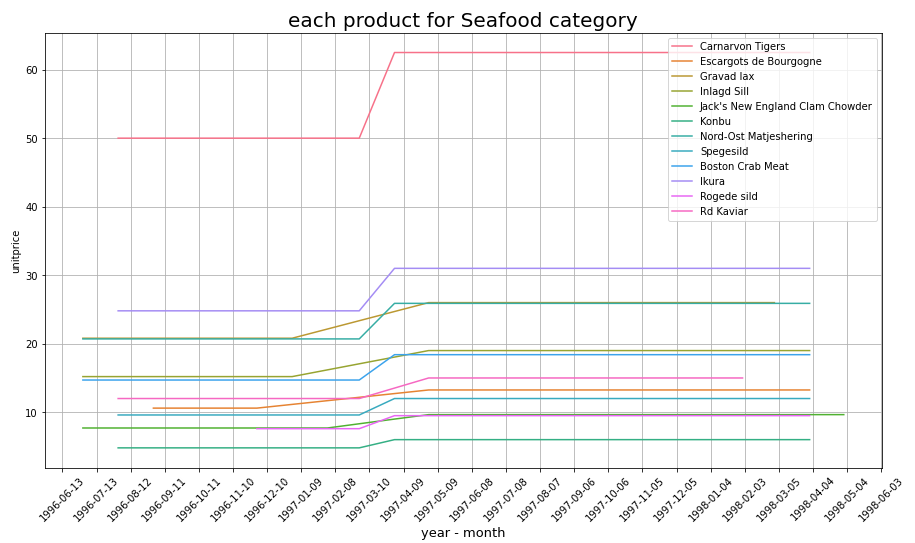

Dari output diatas, saya ingin menelusuri kategori seafood lebih dalam. Dari grafik yang telah diberikan diatas dapat dilihat bahwa product "Carnavon Tigers" memiliki harga tertinggi. 

Apakah dengan harga tertinggi tersebut mendominasi juga untuk rata rata penjualannya ? Untuk melakukan uji statistik tersebut, langkah - langkah yang dilakukan adalah sebagai berikut : 
* mengecek distribusi total sales untuk product seafood
* mencari nilai tengah total sales untuk seluruh product seafood KECUALI "Carnarvon Tigers"
* Uji hipotesis

Kita awali dengan uji statistik tabel yang akan digunakan distate dibawah ini (sebelum dilakukan uji statistik)

In [84]:
quo_4_4.head(3)

,orderdate,year,month,year - month,categoryname,productname,freight,unitprice,quantity,total_sales
0,1996-07-04,1996,7,1996 - 7,Dairy Products,Queso Cabrales,32.38,14.0,12,168.0
1,1996-07-04,1996,7,1996 - 7,Grains/Cereals,Singaporean Hokkien Fried Mee,32.38,9.8,10,98.0
2,1996-07-04,1996,7,1996 - 7,Dairy Products,Mozzarella di Giovanni,32.38,34.8,5,174.0


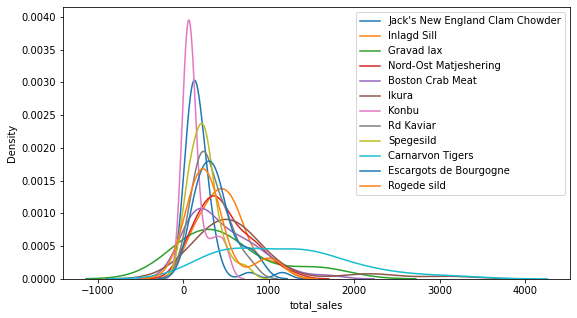

,ks_test_pval,shapiro_test_pval
Jack's New England Clam Chowder,0.000000e+00,1.733646e-09
Inlagd Sill,0.000000e+00,1.240896e-01
Gravad lax,0.000000e+00,8.125626e-02
Nord-Ost Matjeshering,0.000000e+00,1.393725e-01
Boston Crab Meat,0.000000e+00,1.514656e-03
Ikura,0.000000e+00,5.746348e-07
Konbu,3.808781e-226,1.853724e-06
Rd Kaviar,0.000000e+00,4.074949e-01
Spegesild,0.000000e+00,6.071896e-02
Carnarvon Tigers,0.000000e+00,6.703153e-02


In [85]:
# pengujian distribusi normal dengan metode grafis & frequentist
ks_p_value_comp = []
shapiro_comp = []
feature_comp = []

plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
for i in quo_4_4[quo_4_4["categoryname"] == "Seafood"]["productname"].unique() :
    sns.distplot(quo_4_4[quo_4_4["productname"] == i]["total_sales"], hist = False, label = i)
    
    # feature compilation
    feature_comp.append(i)
    
    # uji statistik dengan kolmogorofsmirnov
    ks_statistic, ks_pvalue = kstest(quo_4_4[quo_4_4["productname"] == i]["total_sales"], "norm")
    # hasil uji KS disimpan dalam list yang dibuat sebelumnya
    ks_p_value_comp.append(ks_pvalue)
    
    # uji statistik dengan shapirowilk
    sw_statistic, sw_pvalue = shapiro(quo_4_4[quo_4_4["productname"] == i]["total_sales"])
    # hasil uji shapiro wilk disimpan pada list yang dibuat sebelumnya
    shapiro_comp.append(sw_pvalue)
    
plt.legend()
plt.show()

# hasil pengujian statistik dikompilasi ke dalam suatu dataframe
pd.DataFrame({
    "ks_test_pval" : ks_p_value_comp,
    "shapiro_test_pval" : shapiro_comp},
    index = feature_comp)

Dari grafik yang dihasilkan data total sales setiap productname untuk kategori seafood tersebut right skew atau positive skew.
<br>

Dari hasil pengujian frequentist yang dilakukan dengan Kolmogorof Smirnov dan Shapiro Wilk, keseluruhan data tersebut memiliki nilai pvalue < 0.05. yang artinya kita mengasumsikan data kita tidak terdistribusi normal.
<br>

Berdasarkan grafik dan hasil uji frequentist, data kita tidak terdistribusi normal. maka dari itu untuk pengujian akan dilakukan dengan pengujian non parametrik.

Karena uji yang kita lakukan adalah uji non parameterik. maka nilai tengah untuk totalsales dari seluruh productname pada kategori Seafood KECUALI "Carnarvon Tigers", akan digunakan nilai median.

kita akan mengecek hipotesa menggunakan Mann Whitney. Mengapa kita menggunakan Mann Whitney ? 
<br>
a. karena data total_sales yang kita miliki diasumsikan tidak terdistribusi normal
<br>
b. Jumlah kategori yang ingin dibandingkan ada 2, yaitu "Carnarvon Tigers" dan produk seafood lainnya EXLCUDE "Carnarvon Tigers"
<br>
b. data kita merupakan data numerik
<br>
c. data dikumpulkan secara random
<br>
d. uji ini kita gunakan untuk mencari median populasi

**HIPOTESA**
<br>
H0 : rerata total sales product seafood "Carnarvon Tigers" >= rerata total Sales product seafood lainnya
<br>
Ha : rerata total sales product seafood "Carnarvon Tigers" < rerata total Sales product seafood lainnya
<br>

Disini saya ingin menguji asumsi saya bahwa lebih penting untuk mendiversifikasi produk yang terjangkau dibandingkan dengan fokus dengan 1 product yang memiliki harga tinggi.

In [86]:
# pengujian hipotesa sesuai dengan hipotesis alternatif yang telah dibuat
result = list(mannwhitneyu(
            quo_4_4[(quo_4_4["categoryname"] == "Seafood") & (quo_4_4["productname"] == "Carnarvon Tigers")]["total_sales"],
            quo_4_4[(quo_4_4["categoryname"] == "Seafood") & ~(quo_4_4["productname"] == "Carnarvon Tigers")]["total_sales"],
            alternative = "less"))

print("U - Statistic", result[0])
print("P - Value", result[1])

# membandingkan p value untuk mendapatkan kesimpulan
if result[1] < 0.05 :
    print (f"\nTolak H0 Karena P-Value ({result[1]} < 0.05)")
    print ("kita memiliki cukup bukti bahwa rerata sales untuk produk 'Carnarvon Tigers' < dari seluruh product seafood lainnya")
else :
    print (f"\nTerima H0 Karena P-Value ({result[1]} > 0.05)")
    print ("kita tidak memiliki cukup bukti bahwa rerata total sales untuk produk 'Carnarvon Tigers' < dari seluruh product seafood lainnya")
    print ("rerata total sales untuk produk 'Carnarvon Tigers' >= rerata total sales dari seluruh product seafood lainnya")

U - Statistic 6892.0
P - Value 0.9999999999382863

Terima H0 Karena P-Value (0.9999999999382863 > 0.05)
kita tidak memiliki cukup bukti bahwa rerata total sales untuk produk 'Carnarvon Tigers' < dari seluruh product seafood lainnya
rerata total sales untuk produk 'Carnarvon Tigers' >= rerata total sales dari seluruh product seafood lainnya


**Kesimpulan Hipotesa**
<br>
Dari hasil uji hipotesa non parametrik yang dilakukan dengan metode MannWhitney, bahwa rerata Total Sales untuk product seafood didominasi oleh "Carnarvon Tigers". 

Mungkin ada case bila dihadapkan pada situasi untuk mempertahankan penjualan 1 product seafood "Carnarvon Tigers" ATAU banyak product seafood lainnya. 

Bila dihadapkan pada kasus demikian, dilihat dari data yang ada, lebih baik mempertahankan penjualan 1 product seafood "Carnarvon Tigers" dibandingkan dengan mendiversifikasi product seafood. karena rerata total sales untuk product "Carnarvon Tigers" lebih besar dari rerata penjualan seafood lainnya.

## 4_3_CUSTOMER ANALYSIS


**Customer Analysis 1 -- Loyal Customer by number of transaction & total sales**
<br>
Pada analisis kali ini. saya ingin mencari customer loyal baik dari segi jumlah transaksi dan penghasil total penjualan terbesar. kita awali dengan mempersiapkan datanya terlebih dahulu

Untuk melakukan analisis tersebut saya membuat dataframe baru yang berisikan informasi yang sekiranya relevan saja dengan yang akan dianalisis sebagai berikut : 
* companyname : untuk mengetahui nama perusahaan client
* categoryname : untuk mengetahui kategori item apa yang dipesan
* productname : mengetahui nama produk
* shipcountry : negara tujuan pengiriman, saya asumsikan asal company
* unit price : harga satuan untuk menghitung total penjualan
* quantity : jumlah pemesanan untuk menghitung total penjualan
* totalsales : unit price dikalikan dengan quantity

In [87]:
# membuat dataframe baru dengan informasi yang sekiranya relevan saja untuk dianalisis
quo_5 = df_1[["companyname", "categoryname", "productname", "shipcountry", "unitprice", "quantity", "total_sales"]]
quo_5

,companyname,categoryname,productname,shipcountry,unitprice,quantity,total_sales
0,Vins et alcools Chevalier,Dairy Products,Queso Cabrales,France,14.00,12,168.00
1,Vins et alcools Chevalier,Grains/Cereals,Singaporean Hokkien Fried Mee,France,9.80,10,98.00
2,Vins et alcools Chevalier,Dairy Products,Mozzarella di Giovanni,France,34.80,5,174.00
3,Toms Spezialitten,Produce,Tofu,Germany,18.60,9,167.40
4,Toms Spezialitten,Produce,Manjimup Dried Apples,Germany,42.40,40,1696.00
...,...,...,...,...,...,...,...
2103,White Clover Markets,Confections,Pavlova,USA,17.45,3,52.35
2104,White Clover Markets,Confections,Teatime Chocolate Biscuits,USA,9.20,42,386.40
2105,White Clover Markets,Beverages,Sasquatch Ale,USA,14.00,35,490.00
2106,Drachenblut Delikatessen,Seafood,Jack's New England Clam Chowder,Germany,9.65,9,86.85


Kita peperlukan preprocess lagi untuk data kita dibawah ini. Pertama akan kita munculkan jumlah transaksi dan cumm_total_sales untuk tiap perusahaan

In [88]:
# mengeluarkan tabulasi tabel total sales dan jumlah transaksi dari tiap perusahaan
# untuk menghitung jumlah transaksi menggunakan count product name
# untuk menghitung total sales menggunakan sum
quo_5_1 = quo_5.groupby("companyname").agg({"productname" : "count", "total_sales" : "sum"})
# hanya mengganti nama kolom agar mudah ditelaah
quo_5_1.rename(columns = {"productname" : "n_transaction", "total_sales" : "cumm_total_sales"}, inplace = True)
# company name yang awalnya index ingin saya jadikan feature agar mudah dimanipulasi atau dimanfaatkan
quo_5_1 = quo_5_1.reset_index()
quo_5_1.head(5)

,companyname,n_transaction,cumm_total_sales
0,Alfreds Futterkiste,12,4596.20
1,Ana Trujillo Emparedados y helados,10,1402.95
2,Antonio Moreno Taquera,17,7515.35
3,Around the Horn,30,13806.50
4,B's Beverages,22,6089.90


Karena data yang dihasilkan terlalu banyak, disini saya batasi perusahaan top 10 saja baik dari segi jumlah pembelian dan total sales. Output diberikan dalam bentuk tabel numerik dan grafik

In [89]:
# hanya menampilkan dataframe secara bersebelahan. lihat dibagian library
# telah dijelaskan di video pada general information.
display_side_by_side(
    quo_5_1.sort_values(by = "n_transaction", ascending = False)[:10],
    quo_5_1.sort_values(by = "cumm_total_sales", ascending = False)[:10],
    titles = ["Company Rank By n_transaction", "Company Rank By TotalSales"])

,companyname,n_transaction,cumm_total_sales
69,Save-a-lot Markets,116,115673.39
20,Ernst Handel,95,103115.18
59,QUICK-Stop,86,117483.39
36,Hungry Owl All-Night Grocers,55,57317.39
5,Berglunds snabbkp,52,26968.15
26,Frankenversand,48,28722.71
63,Rattlesnake Canyon Grocery,46,50871.30
33,HILARION-Abastos,45,23611.58
23,Folk och f HB,45,32555.55
9,Bon app',41,22793.95


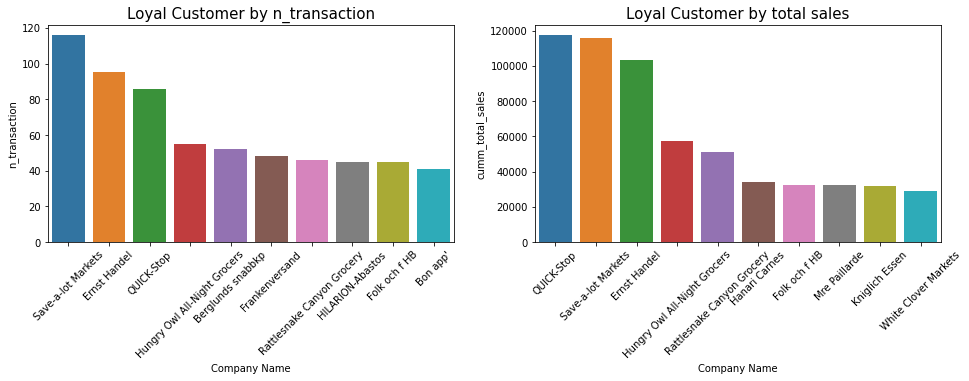

In [90]:
# diberikan alternatif visualisasi dengan grafik (pembanding dengan tabulasi data diatasnya)
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.barplot(data = quo_5_1.sort_values(by = "n_transaction", ascending = False)[:10], x = "companyname", y = "n_transaction")
plt.title("Loyal Customer by n_transaction", size = 15)
plt.xlabel("Company Name", size = 10)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.barplot(data = quo_5_1.sort_values(by = "cumm_total_sales", ascending = False)[:10], x = "companyname", y = "cumm_total_sales")
plt.title("Loyal Customer by total sales", size = 15)
plt.xlabel("Company Name", size = 10)
plt.xticks(rotation = 45)

plt.show()

Mari sedikit melihat data yang ada. Dari total sekitar 2000an transaksi yang terjadi pada pertengahan tahun 1996 hingga pertengahan 1998, dominasi pembeli terloyal dari segi jumlah transaksi jatuh pada perusahaan sebagai berikut:
* Save a - lot markets (n_transaction = 116)
* Ernst Handel (n_transaction = 95)
* Quick - Stop (n_transaction = 86)
Ketiga perusahaan tersebut berhasil mendominasi jumlah transaksi hampir 2 kali lipat dibandingkan perusahaan perusaahaan lainnya jika dilihat pada grafik diatas (n_transaction)

Jika kita lihat dari segi totalsales yang dihasilkan, customer loyal jatuh pada perusahaan sebagai berikut : 
* Quick - Stop
* Save a - lot markets
* Ernst Handel
Secara total sales, ketiga perusahaan tersebut mendominasi total sales. dan dari grafik yang disediakan bahwa total sales ketiga perusahaan itu juga hampir 2 kali lipat perusahaan lainnya yang ada di grafik (total sales)

Saat ada produk baru yang bisa ditawarkan, ada baiknya pertama kali ditawarkan ke top 3 perusahaan top 3 baik secara total sales dan jumlah transaksi. Hal ini dilakukan untuk menjalin kepercayaan yang sudah ada dengan perusahaan tersebut. Informasi terbaru ini tentunya memiliki benefit tersendiri bagi perusahaan yang mengetahuinya lebih dahulu.

Secara produk yang ditawarkan, dengan mengetahui kedua informasi dari tabel dan grafik diatas, approach penawaran ke tiap perusahaan juga bisa disesuaikan. Misal, untuk produk dengan harga yang relatif tinggi bisa ditawarkan terlebih dahulu ke perusahaan yang memiliki total sales tertinggi, karena perusahaan tersebut memiliki daya beli. Untuk produk dengan harga yang relatif rendah, bisa ditawarkan ke perusahaan lain.

Untuk customer lain, dapat dipelajari terlebih dahulu histori transaksi yang mereka miliki. Selain memperhatikan pelanggan loyal, pelanggan yang memiliki jumlah transaksi yang tidak terlalu banyak juga perlu diperhatikan. Hal ini bisa dianalisis lebih jauh kenapa mereka tidak membeli terlalu banyak ? bisa saja karena : 
* customer belum mengetahui kategori produk lain yang bisa disediakan dan sejenisnya.
* ukuran perusahaan
* dan lain sebagainya

Coba memperhatikan NEEDS konsumen untuk menyesuaikan treatment yang dapat diberikan ke konsumen agar tidak "churn" ke kompetitor lain.

**Customer Analysis 2 -- Komparasi rerata sales dari Perusahaan Ernst Handle dan Quick Stop**
<br>
Disini, untuk menguji apakah rerata total sales untuk perusahaan Quick-Stop lebih besar dari perusahaan Ernst Handel ? 
<br>

kita memerlukan uji hipotesa untuk mengcompare kedua total sales dari kedua perusahaan tersebut, langkah yang dilakukan adalah
* mengecek distribusi total sales untuk perusahaan Ernst Handel dan Quick-Stop
* Uji hipotesis

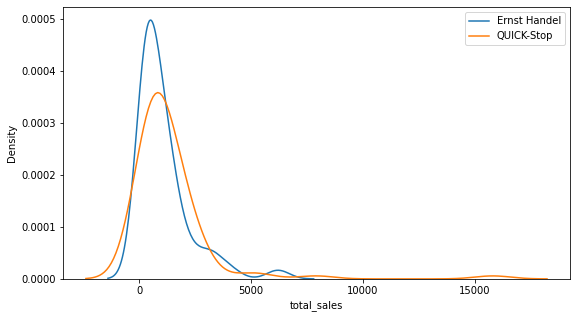

,ks_test_pval,shapiro_test_pval
Ernst Handel,0.0,1.476342e-11
QUICK-Stop,0.0,9.698924e-16


In [91]:
# pengujian distribusi normal dengan metode grafis & frequentist
ks_p_value_comp = []
shapiro_comp = []
feature_comp = []

plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
for i in quo_5[quo_5["companyname"].isin(["Ernst Handel", "QUICK-Stop"])]["companyname"].unique() :
    sns.distplot(quo_5[quo_5["companyname"] == i]["total_sales"], hist = False, label = i)
    
    # feature compilation
    feature_comp.append(i)
    
    # uji statistik dengan kolmogorofsmirnov
    ks_statistic, ks_pvalue = kstest(quo_5[quo_5["companyname"] == i]["total_sales"], "norm")
    # hasil pengujian KS disimpan dalam list yang dibuat sebelumnya
    ks_p_value_comp.append(ks_pvalue)
    
    # uji statistik dengan shapirowilk
    sw_statistic, sw_pvalue = shapiro(quo_5[quo_5["companyname"] == i]["total_sales"])
    # hasil pengujian shapiro wilk disimpan dalam list yang dibuat sebelumnya
    shapiro_comp.append(sw_pvalue)
    
plt.legend()
plt.show()

# hasil pengujian statistik dikompilasi ke dalam suatu dataframe
pd.DataFrame({
    "ks_test_pval" : ks_p_value_comp,
    "shapiro_test_pval" : shapiro_comp},
    index = feature_comp)

Dari grafik yang dihasilkan hasil distribusi data total sales untuk Ernst Handel dan Quick-Stop menunjukan adanya right skew atau positive skew.
<br>

Dari hasil pengujian frequentist yang dilakukan dengan Kolmogorof Smirnov dan Shapiro Wilk, data total sales untuk kedua perusahan tersebut tersebut memiliki nilai pvalue < 0.05. yang artinya kita mengasumsikan data kita tidak terdistribusi normal.
<br>

Berdasarkan grafik dan hasil uji frequentist, data kita tidak terdistribusi normal. maka dari itu untuk pengujian akan dilakukan dengan pengujian non parametrik.

kita akan mengecek hipotesa menggunakan Mann Whitney. Mengapa kita menggunakan Mann Whitney ? 
<br>
a. karena data total_sales untuk kedua perusahaan yang kita miliki diasumsikan tidak terdistribusi normal
<br>
c. data kita merupakan data numerik
<br>
d. data dikumpulkan secara random
<br>
e. uji ini kita gunakan untuk mencari median populasi

**HIPOTESA**
<br>
H0 : rerata total sales perusahaan QuickStop <= rerata total sales perusahaan Ernst Handle
<br>
Ha : rerata total sales QuickStop > rerata total sales perusahaan Ernst Handle
<br>

Disini saya ingin menguji apakah total sales Quick-Stop lebih besar secara signifikan terhadap total sales dari perusahaan Ernst Handel

In [92]:
# melakukan uji hipotesa sesuai dengan hipotesa yang telah dibuat diatasnya
result = list(mannwhitneyu(
            quo_5[quo_5["companyname"] == "QUICK-Stop"]["total_sales"],
            quo_5[quo_5["companyname"] == "Ernst Handel"]["total_sales"],
            alternative = "greater"))

# mendapatkan p value
print("U - Statistic", result[0])
print("P - Value", result[1])

# mendapatkan kesimpulan dari p value yang didapatkan
if result[1] < 0.05 :
    print (f"\nTolak H0 Karena P-Value ({result[1]} < 0.05)")
    print ("kita memiliki cukup bukti bahwa rerata total sales untuk Perusahaan Quick-Stop > rerata total Sales Perusahaan Ernst Handel")
else :
    print (f"\nTerima H0 Karena P-Value ({result[1]} > 0.05)")
    print ("kita TIDAK memiliki cukup bukti bahwa rerata total sales untuk Perusahaan Quick-Stop > rerata total Sales Perusahaan Ernst Handel")
    print ("rerata total sales untuk Perusahaan QuickStop <= rerata total Sales Perusahaan Ernst Handle")

U - Statistic 4703.5
P - Value 0.03957260169560248

Tolak H0 Karena P-Value (0.03957260169560248 < 0.05)
kita memiliki cukup bukti bahwa rerata total sales untuk Perusahaan Quick-Stop > rerata total Sales Perusahaan Ernst Handel


**Kesimpulan Hipotesa**
<br>
Dari hasil uji hipotesa non parametrik yang dilakukan dengan metode MannWhitney, bahwa hasil uji menunjukan bahwa rerata total sales untuk perusahaan Quick - Stop lebih besar dibandingkan dengan perusahaan Ernst - Handle

## 4_4_EXPEDITION SERVICES

Pada bagian ini diberikan visualisasi untuk menghighlight kombinasi parameter ini : 
* Shippedby merupakan jasa ekspedisi yang dipilih
* Categoryname cukup jelas, kategori item yang dideliver oleh ekspedisi
* total transaksi yang dihandle oleh ekspedisi

Visualisasi ini tidak diberikan filter. karena keseluruhan informasi telah tampil dengan jelas dari grafik yang diberikan

In [93]:
%%HTML
<div class='tableauPlaceholder' id='viz1648442408111' style='position: relative'><noscript><a href='#'><img alt='Shipped By ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;ShippedBy&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ChapstoneII-DataAnalysis&#47;ShippedBy' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;ChapstoneII-DataAnalysis&#47;ShippedBy&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648442408111');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Output diatas bisa menjawab pertanyaan seperti : 
* Siapa jasa expedisi yang paling banyak melakukan pengiriman ? United Package sebesar 812 Package. Dilanjutkan dengan Speedy Express dan Federal Shipping
* Untuk proporsi item yang dideliver setiap kategorinya juga sudah diberikan seperti pada grafik terlampir.